<a href="https://colab.research.google.com/github/Sameenj4/Car-Price-Prediction/blob/main/Car_Price_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<font size="+3">Car Price Prediction**

**<font size="+2"> An End-to-End Data Analysis and Model Building Project**

**<font size="+2">Prepared by Sameen J, 31-07-2025**

<font size="+2">**📌 Introduction**

<font size="+2">**Predicting car prices is a crucial task for both buyers and sellers in the automotive industry. This project aims to build a machine learning model to estimate car prices based on various features such as car brand, year, mileage, fuel type, transmission, and other attributes.**

<font size="+2">**We will go through the complete data science pipeline, including:**

<font size="+2">*   **Data Cleaning & Preprocessing**

<font size="+2">*   **Exploratory Data Analysis (EDA)**

<font size="+2">*   **Feature Engineering & Selection**

<font size="+2">*   **Model Training (Linear Regression, Decision Tree, Random Forest)**

<font size="+2">*  **Model Evaluation & Comparison**

<font size="+2">*  **Insights & Conclusion**

# **Data Loading & Setup**

<font size="+3">**Explanation:**

<font size="+3">This initial script sets up the environment for a machine learning project aimed at predicting car prices. It imports essential Python libraries for data manipulation (NumPy, Pandas), visualization (Matplotlib, Seaborn), preprocessing (LabelEncoder, scaling), model building (Linear Regression, Decision Trees, Random Forest), and evaluation (R² score, MSE). The dataset is stored in Google Drive and is loaded into the Colab environment for further analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV,RandomizedSearchCV

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df=pd.read_csv('/content/drive/MyDrive/DA_docs/DA_Project_Docs/Car_Price_Prediction_Doc/Copy of CarPrice.csv')

# **Data Exploration – Understanding the Dataset**

<font size="+2">**Explanation:**

<font size="+2">**This section performs an initial exploration of the dataset to understand its structure, size, and quality.**

In [4]:
df.shape

(205, 26)

In [5]:
df.head(10)

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   
5       6          2                  audi fox      gas        std        two   
6       7          1                audi 100ls      gas        std       four   
7       8          1                 audi 5000      gas        std       four   
8       9          1                 audi 4000      gas      turbo       four   
9      10          0       audi 5000s (diesel)      gas      turbo        two   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   
5        sedan        fwd          front       99.8  ...         136   
6        sedan        fwd          front      105.8  ...         136   
7        wagon        fwd          front      105.8  ...         136   
8        sedan        fwd          front      105.8  ...         131   
9    hatchback        4wd          front       99.5  ...         131   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   
5        mpfi       3.19    3.40              8.5        110     5500      19   
6        mpfi       3.19    3.40              8.5        110     5500      19   
7        mpfi       3.19    3.40              8.5        110     5500      19   
8        mpfi       3.13    3.40              8.3        140     5500      17   
9        mpfi       3.13    3.40              7.0        160     5500      16   

   highwaympg      price  
0          27  13495.000  
1          27  16500.000  
2          26  16500.000  
3          30  13950.000  
4          22  17450.000  
5          25  15250.000  
6          25  17710.000  
7          25  18920.000  
8          20  23875.000  
9          22  17859.167  

[10 rows x 26 columns]

In [6]:
df.tail(10)

car_ID  symboling          CarName fueltype aspiration doornumber  \
195     196         -1      volvo 144ea      gas        std       four   
196     197         -2      volvo 244dl      gas        std       four   
197     198         -1        volvo 245      gas        std       four   
198     199         -2      volvo 264gl      gas      turbo       four   
199     200         -1     volvo diesel      gas      turbo       four   
200     201         -1  volvo 145e (sw)      gas        std       four   
201     202         -1      volvo 144ea      gas      turbo       four   
202     203         -1      volvo 244dl      gas        std       four   
203     204         -1        volvo 246   diesel      turbo       four   
204     205         -1      volvo 264gl      gas      turbo       four   

    carbody drivewheel enginelocation  wheelbase  ...  enginesize  fuelsystem  \
195   wagon        rwd          front      104.3  ...         141        mpfi   
196   sedan        rwd          front      104.3  ...         141        mpfi   
197   wagon        rwd          front      104.3  ...         141        mpfi   
198   sedan        rwd          front      104.3  ...         130        mpfi   
199   wagon        rwd          front      104.3  ...         130        mpfi   
200   sedan        rwd          front      109.1  ...         141        mpfi   
201   sedan        rwd          front      109.1  ...         141        mpfi   
202   sedan        rwd          front      109.1  ...         173        mpfi   
203   sedan        rwd          front      109.1  ...         145         idi   
204   sedan        rwd          front      109.1  ...         141        mpfi   

     boreratio  stroke compressionratio horsepower  peakrpm citympg  \
195       3.78    3.15              9.5        114     5400      23   
196       3.78    3.15              9.5        114     5400      24   
197       3.78    3.15              9.5        114     5400      24   
198       3.62    3.15              7.5        162     5100      17   
199       3.62    3.15              7.5        162     5100      17   
200       3.78    3.15              9.5        114     5400      23   
201       3.78    3.15              8.7        160     5300      19   
202       3.58    2.87              8.8        134     5500      18   
203       3.01    3.40             23.0        106     4800      26   
204       3.78    3.15              9.5        114     5400      19   

     highwaympg    price  
195          28  13415.0  
196          28  15985.0  
197          28  16515.0  
198          22  18420.0  
199          22  18950.0  
200          28  16845.0  
201          25  19045.0  
202          23  21485.0  
203          27  22470.0  
204          25  22625.0  

[10 rows x 26 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [8]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [9]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [10]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
200    False
201    False
202    False
203    False
204    False
Length: 205, dtype: bool

In [11]:
df.duplicated().any()

np.False_

In [12]:
df.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

# **Data Cleaning – Standardizing Column Names**

<font size="+2">**Explanation:**

<font size="+2">**This step renames dataset columns to be more descriptive and consistent, improving readability and understanding for future analysis.**

In [13]:
df.rename(columns={'car_ID':'Car_ID'}, inplace=True)
df.rename(columns={'symboling': 'Symboling'}, inplace=True)
df.rename(columns={'CarName': 'Car_Name'}, inplace=True)
df.rename(columns={'fueltype': 'Fuel_Type'}, inplace=True)
df.rename(columns={'aspiration': 'Aspiration'}, inplace=True)
df.rename(columns={'doornumber': 'No_of_Doors'}, inplace=True)
df.rename(columns={'carbody': 'Body_Type'}, inplace=True)
df.rename(columns={'drivewheel': 'Drive_Type'}, inplace=True)
df.rename(columns={'enginelocation': 'Engine_Location'}, inplace=True)
df.rename(columns={'wheelbase': 'Wheel_Base'}, inplace=True)
df.rename(columns={'carlength': 'Car_Length'}, inplace=True)
df.rename(columns={'carwidth': 'Car_Width'}, inplace=True)
df.rename(columns={'carheight': 'Car_Height'}, inplace=True)
df.rename(columns={'curbweight': 'Car_Weight'}, inplace=True)
df.rename(columns={'enginetype': 'Engine_Type'}, inplace=True)
df.rename(columns={'cylindernumber': 'Cylinder_Number'}, inplace=True)
df.rename(columns={'enginesize': 'Engine_Size'}, inplace=True)
df.rename(columns={'fuelsystem': 'Fuel_System'}, inplace=True)
df.rename(columns={'boreratio': 'Bore_Ratio'}, inplace=True)#The boreratio (bore/stroke ratio) is an engine metric that influences performance—>1.0 means higher speed (sports cars), <1.0 means more torque and efficiency (SUVs), and ≈1.0 offers balanced performance.
df.rename(columns={'stroke': 'Stroke'}, inplace=True)
df.rename(columns={'compressionratio': 'Compression_Ratio'}, inplace=True)
df.rename(columns={'horsepower': 'Horsepower'}, inplace=True)
df.rename(columns={'peakrpm': 'Peak_RPM'}, inplace=True)#peak Revolutions Per Minute
df.rename(columns={'citympg': 'City_MPG'}, inplace=True)#city miles per gallon
df.rename(columns={'highwaympg': 'Highway_MPG'}, inplace=True)
df.rename(columns={'price': 'Price'}, inplace=True)


In [14]:
df.to_csv('Final_Car_Price_Data.csv', index=False)

from google.colab import files
files.download('Final_Car_Price_Data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Feature Engineering – Extracting Car Brand & Identifying Numerical Columns**

<font size="+2">**Explanation:**

<font size="+2">Brand Extraction:

<font size="+2">A new column, Brand, is created by splitting the Car_Name string and taking the first word (converted to lowercase). This allows grouping and analysis based on manufacturer names.

<font size="+2">Numerical Feature Identification:

<font size="+2">numerical_cols and numerical_columns store lists of numeric columns (excluding object types) for quick reference.

<font size="+2">This step is important for later tasks like statistical analysis, scaling, and model training, which often require numeric inputs.

In [15]:
df['Brand'] = df['Car_Name'].apply(lambda x: x.split()[0].lower())


In [16]:
numerical_cols=df.select_dtypes(exclude=['object']).columns
df[numerical_cols].head(2)

Car_ID  Symboling  Wheel_Base  Car_Length  Car_Width  Car_Height  \
0       1          3        88.6       168.8       64.1        48.8   
1       2          3        88.6       168.8       64.1        48.8   

   Car_Weight  Engine_Size  Bore_Ratio  Stroke  Compression_Ratio  Horsepower  \
0        2548          130        3.47    2.68                9.0         111   
1        2548          130        3.47    2.68                9.0         111   

   Peak_RPM  City_MPG  Highway_MPG    Price  
0      5000        21           27  13495.0  
1      5000        21           27  16500.0

In [17]:
numerical_columns = df.select_dtypes(include=['number']).columns
print(numerical_columns)

Index(['Car_ID', 'Symboling', 'Wheel_Base', 'Car_Length', 'Car_Width',
       'Car_Height', 'Car_Weight', 'Engine_Size', 'Bore_Ratio', 'Stroke',
       'Compression_Ratio', 'Horsepower', 'Peak_RPM', 'City_MPG',
       'Highway_MPG', 'Price'],
      dtype='object')


# **Fuel Type Distributions**

<font size="+2">**Hypothesis: Fuel type significantly influences car pricing due to differences in operating costs, efficiency, and market demand.**

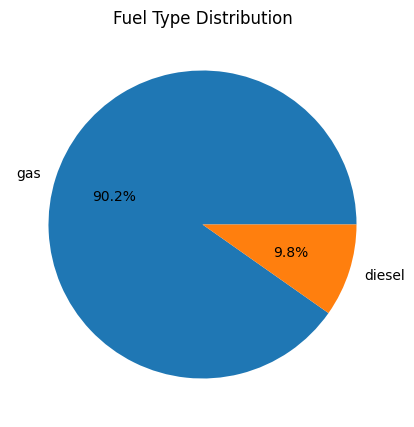

In [18]:
df['Fuel_Type'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(5, 5))
plt.ylabel('')
plt.title('Fuel Type Distribution')
plt.show()


# **Heatmap Showing Correlation Between Numerical Car Features**

<font size="+2">**Hypothesis: Numerical performance attributes like engine size, horsepower, and curb weight strongly influence car pricing trends.**

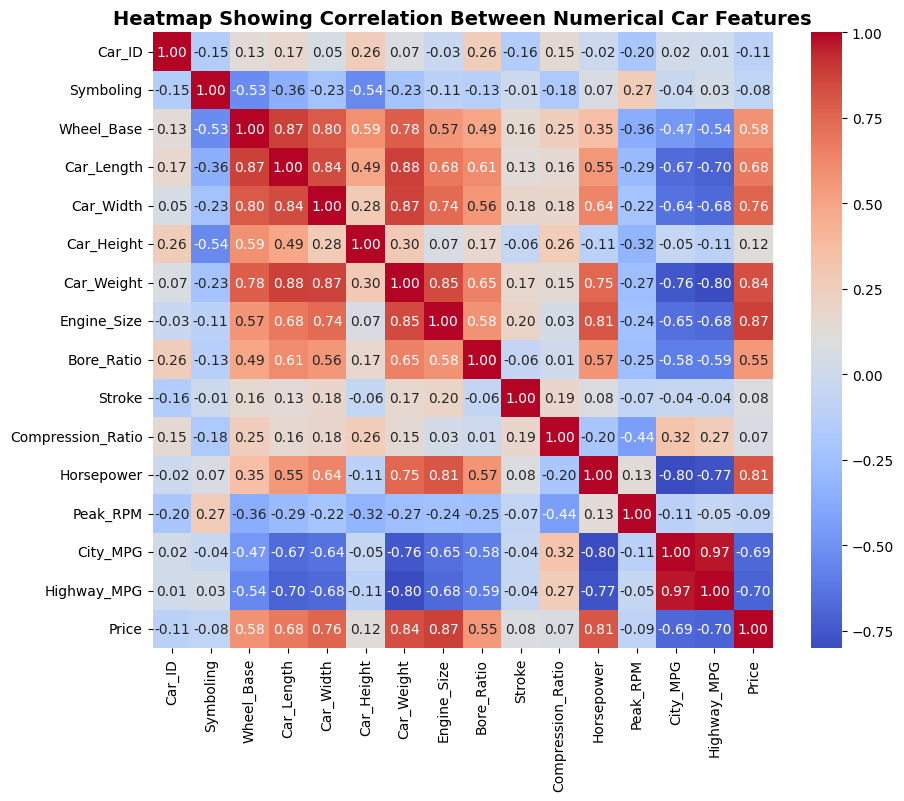

In [19]:
corr_matrix = df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Showing Correlation Between Numerical Car Features", fontsize=14, fontweight='bold')
plt.show()


# **Relationship Between Horsepower and Car Price**

<font size="+2">**Hypothesis: Increased horsepower tends to drive higher car prices, reflecting its role in enhancing vehicle performance and consumer appeal.**

Text(0.5, 1.0, 'Relationship Between Horsepower and Car Price')

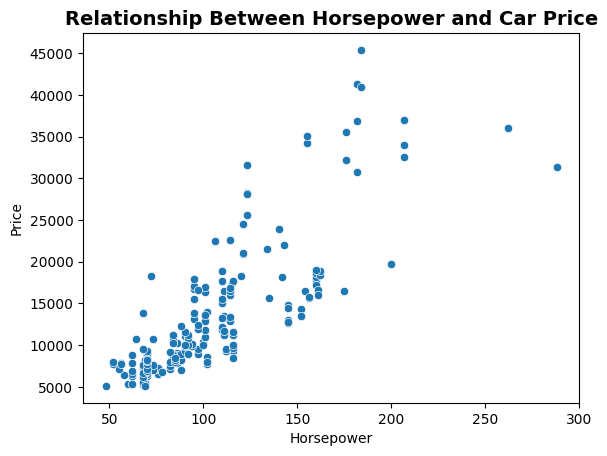

In [20]:
sns.scatterplot(data=df, x='Horsepower', y='Price')
plt.title('Relationship Between Horsepower and Car Price', fontsize=14, fontweight='bold')


# **Impact of Body Type on Car Pricing**

<font size="+2">**Hypothesis: Variations in body type reflect differences in design, utility, and market positioning, leading to significant price disparities across categories.**

Text(0.5, 1.0, 'Price Distribution Across Different Car Body Types')

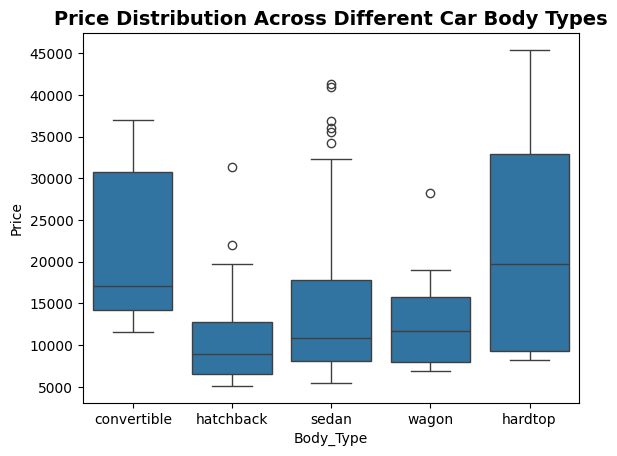

In [21]:
sns.boxplot(data=df, x='Body_Type', y='Price')
plt.title('Price Distribution Across Different Car Body Types', fontsize=14, fontweight='bold')

# **Influence of City Fuel Efficiency on Car Pricing**

<font size="+2">**Hypothesis: Higher city MPG is generally associated with lower car prices, as fuel-efficient models often prioritize economy over premium performance features.**

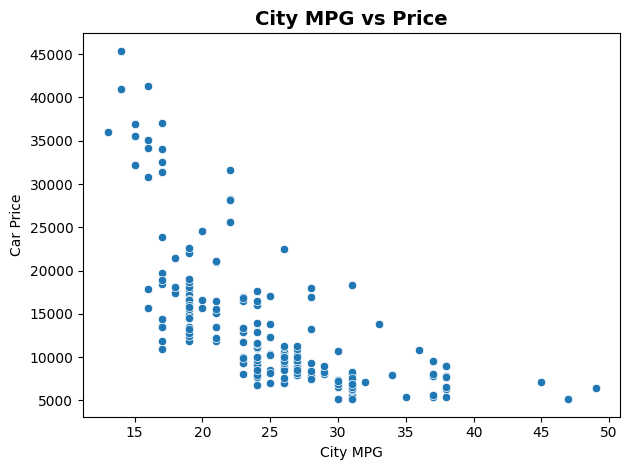

In [22]:
sns.scatterplot(data=df, x='City_MPG', y='Price')
plt.title('City MPG vs Price', fontsize=14, fontweight='bold')
plt.xlabel('City MPG')
plt.ylabel('Car Price')
plt.tight_layout()
plt.show()


# **Comparison of Average Car Prices by Brand**

<font size="+2">**Hypothesis: Brand reputation and market positioning significantly influence average car prices, with premium brands commanding substantially higher values than economy-focused manufacturers.**

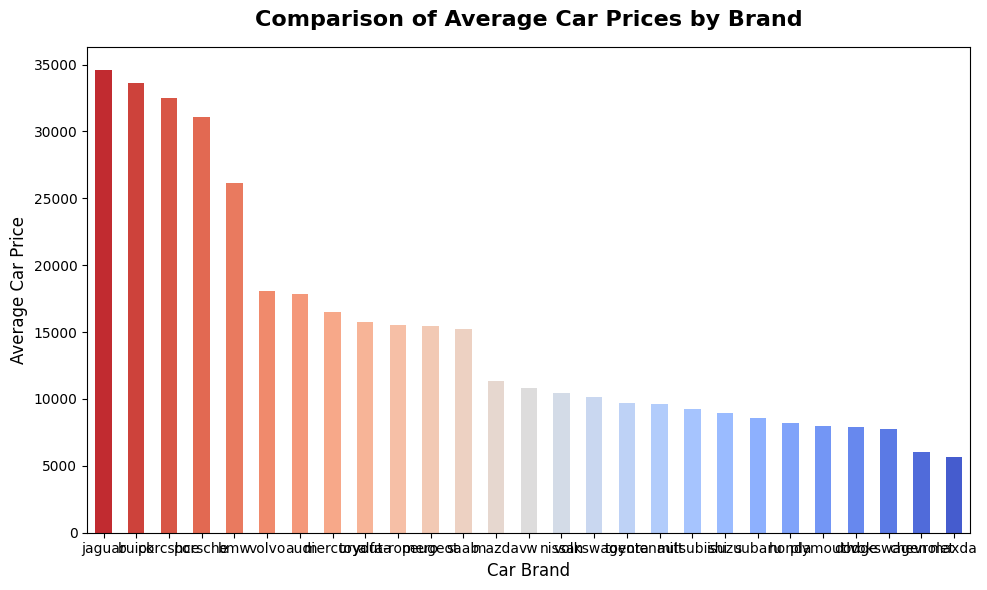

In [23]:
brand_avg = df.groupby('Brand')['Price'].mean().sort_values(ascending=False)
colors = sns.color_palette("coolwarm", len(brand_avg))[::-1]

# Plotting
brand_avg.plot(kind='bar', figsize=(10,6), color=colors)
plt.xlabel("Car Brand", fontsize=12)
plt.ylabel("Average Car Price", fontsize=12)
plt.title("Comparison of Average Car Prices by Brand", fontsize=16, fontweight='bold', pad=15)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [24]:
df.drop(['Car_ID', 'Car_Name'], axis=1, inplace=True)

# **Distribution Analysis of Key Car Attributes**

**<font size="+2">Hypothesis: Gasoline-powered vehicles dominate the market share, indicating consumer preference for petrol over diesel options.**


/tmp/ipython-input-3913626580.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Fuel_Type', data=df, palette='viridis')


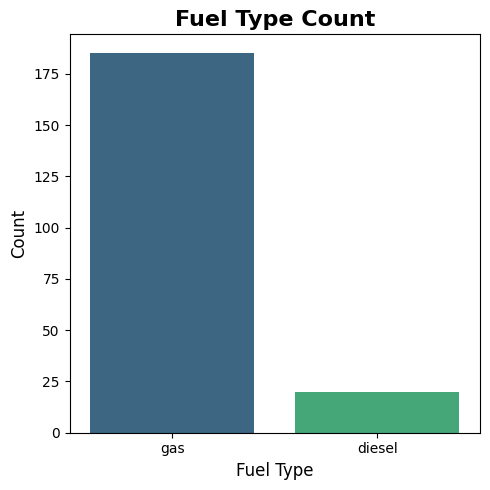

In [25]:
plt.figure(figsize=(5,5))
sns.countplot(x='Fuel_Type', data=df, palette='viridis')
plt.title('Fuel Type Count', fontsize=16, fontweight='bold')
plt.xlabel('Fuel Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


**<font size="+2">Hypothesis: Standard aspiration systems are more prevalent, suggesting limited adoption of turbocharged configurations.**

/tmp/ipython-input-4121950785.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Aspiration', data=df, palette='plasma')


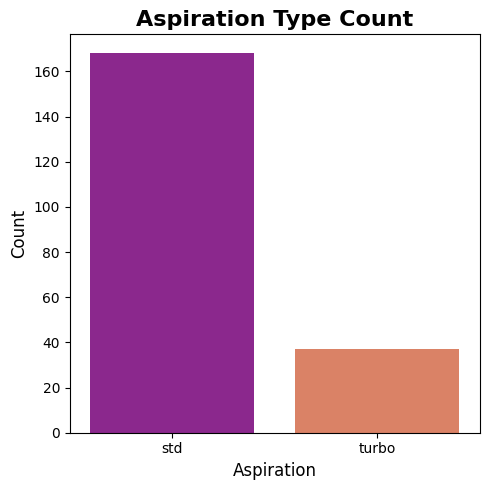

In [26]:
plt.figure(figsize=(5, 5))
sns.countplot(x='Aspiration', data=df, palette='plasma')
plt.title('Aspiration Type Count', fontsize=16, fontweight='bold')
plt.xlabel('Aspiration', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


**<font size="+2">Hypothesis:Four-door vehicles are the most common, reflecting higher consumer demand for practicality and passenger capacity.**

/tmp/ipython-input-126619647.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='No_of_Doors', data=df, palette='coolwarm')


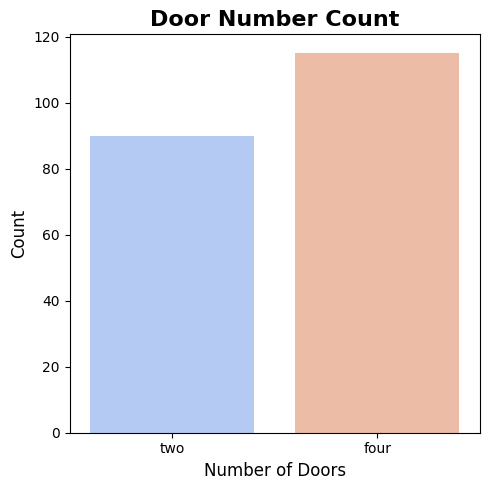

In [27]:
plt.figure(figsize=(5, 5))
sns.countplot(x='No_of_Doors', data=df, palette='coolwarm')
plt.title('Door Number Count', fontsize=16, fontweight='bold')
plt.xlabel('Number of Doors', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


**<font size="+2">Hypothesis: Sedans lead the market, followed by hatchbacks, indicating a balance between comfort and compact utility.**

/tmp/ipython-input-4053143161.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Body_Type', data=df, palette='magma')


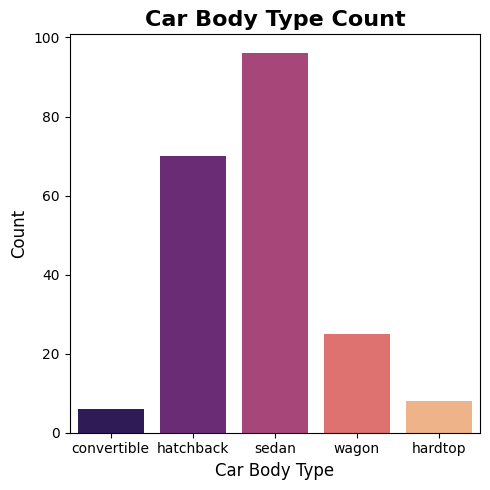

In [28]:
plt.figure(figsize=(5,5))
sns.countplot(x='Body_Type', data=df, palette='magma')
plt.title('Car Body Type Count', fontsize=16, fontweight='bold')
plt.xlabel('Car Body Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


**<font size="+2">Hypothesis: Front-wheel drive configurations are dominant, aligning with cost efficiency and better traction for everyday driving.**

/tmp/ipython-input-2300268260.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Drive_Type', data=df, palette='cubehelix')


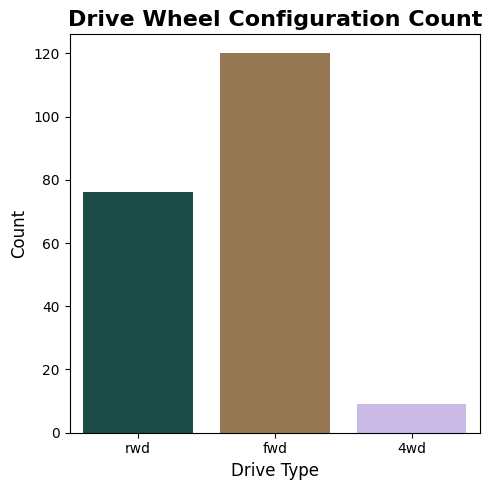

In [29]:
plt.figure(figsize=(5, 5))
sns.countplot(x='Drive_Type', data=df, palette='cubehelix')
plt.title('Drive Wheel Configuration Count', fontsize=16, fontweight='bold')
plt.xlabel('Drive Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


**<font size="+2">Hypothesis: Front-engine layouts are overwhelmingly preferred, likely due to design efficiency and easier maintenance.**

/tmp/ipython-input-2726527421.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Engine_Location', data=df, palette='flare')


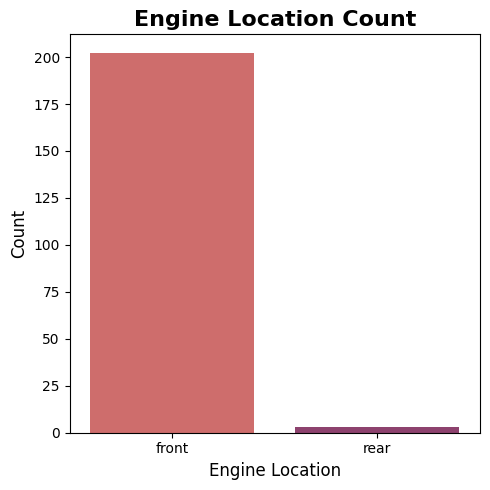

In [30]:
plt.figure(figsize=(5, 5))
sns.countplot(x='Engine_Location', data=df, palette='flare')
plt.title('Engine Location Count', fontsize=16, fontweight='bold')
plt.xlabel('Engine Location', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


**<font size="+2">Hypothesis: Overhead camshaft (OHC) engines are most common, reflecting industry preference for improved efficiency and performance.**

/tmp/ipython-input-2602850526.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Engine_Type', data=df, palette='crest')


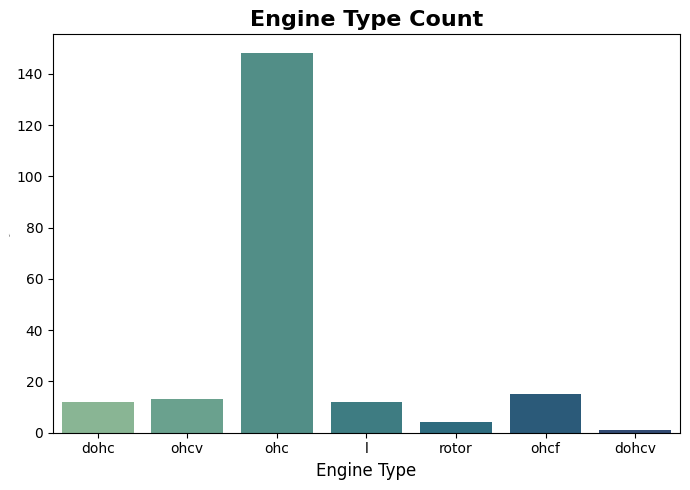

In [31]:
plt.figure(figsize=(7, 5))
sns.countplot(x='Engine_Type', data=df, palette='crest')
plt.title('Engine Type Count', fontsize=16, fontweight='bold')
plt.xlabel('Engine Type', fontsize=12)
plt.ylabel('Count', fontsize=0)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


**<font size="+2">Hypothesis: Four-cylinder engines dominate, aligning with trends toward fuel efficiency and lower production costs.**

/tmp/ipython-input-1392973704.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cylinder_Number', data=df, palette='rocket')


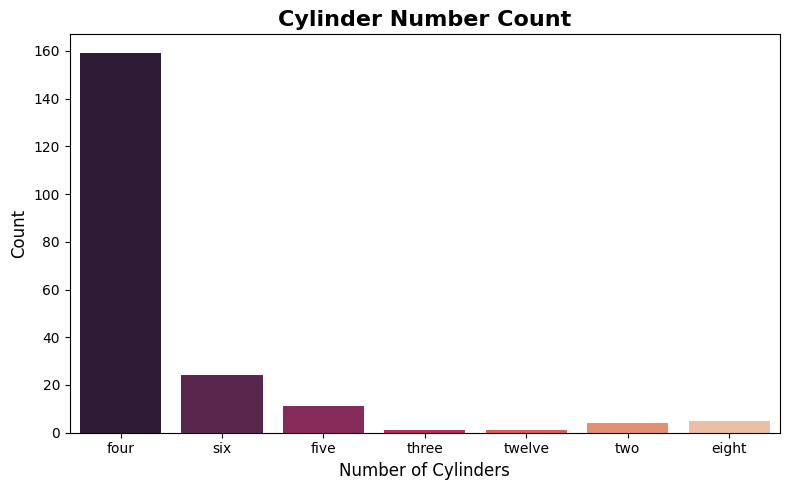

In [32]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Cylinder_Number', data=df, palette='rocket')
plt.title('Cylinder Number Count', fontsize=16, fontweight='bold')
plt.xlabel('Number of Cylinders', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


**<font size="+2">Hypothesis: Multi-point fuel injection (MPFI) systems lead the market, followed by 2-barrel carburetors, indicating a shift toward modern fuel delivery technology.**

/tmp/ipython-input-665424724.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Fuel_System', data=df, palette='viridis')


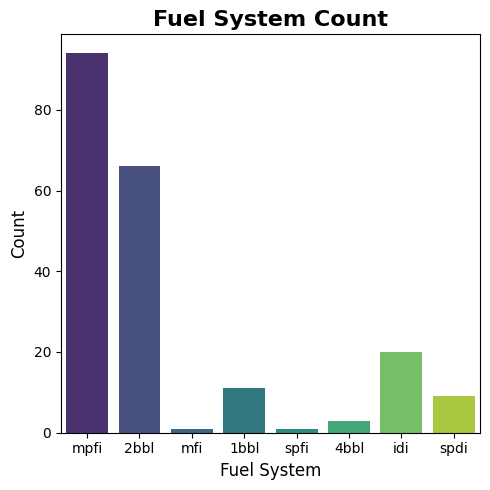

In [33]:
plt.figure(figsize=(5, 5))
sns.countplot(x='Fuel_System', data=df, palette='viridis')

plt.title('Fuel System Count', fontsize=16, fontweight='bold')
plt.xlabel('Fuel System', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# **Comparative Analysis of Vehicle Attributes Affecting Price**

**<font size="+2">Hypothesis:Vehicles with turbo aspiration generally have higher median prices than those with standard aspiration, likely due to enhanced performance capabilities and premium market positioning.**



/tmp/ipython-input-719686956.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Aspiration', y='Price', data=df, palette='Set2')


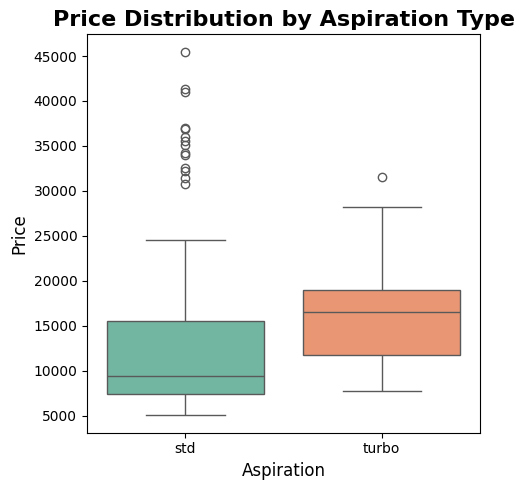

In [34]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='Aspiration', y='Price', data=df, palette='Set2')
plt.title('Price Distribution by Aspiration Type', fontsize=16, fontweight='bold')
plt.xlabel('Aspiration', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


**<font size="+2">Hypothesis: Lower symboling (safer cars) is linked to higher prices, while higher symboling often relates to sportier or budget models with lower prices.**

/tmp/ipython-input-4168425839.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Symboling', y='Price', data=df, palette='coolwarm')


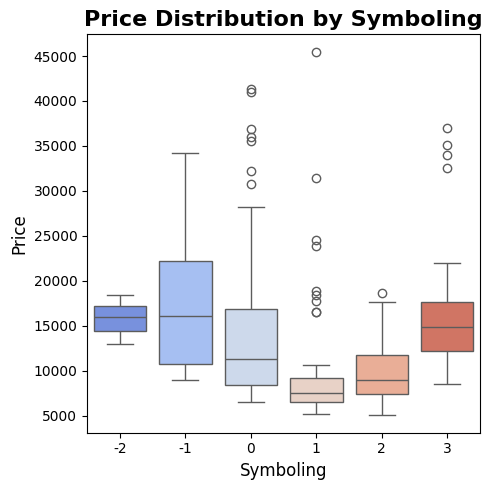

In [35]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='Symboling', y='Price', data=df, palette='coolwarm')
plt.title('Price Distribution by Symboling', fontsize=16, fontweight='bold')
plt.xlabel('Symboling', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


**<font size="+2">Hypothesis: Cars with two doors often target sportier or niche markets, potentially resulting in higher price ranges compared to four-door models which focus on practicality.**

/tmp/ipython-input-2029712763.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='No_of_Doors', y='Price', data=df, palette='Set3')


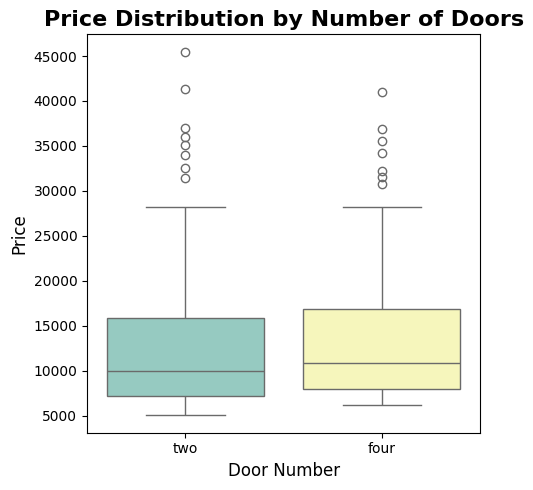

In [36]:
plt.figure(figsize=(5,5))
sns.boxplot(x='No_of_Doors', y='Price', data=df, palette='Set3')
plt.title('Price Distribution by Number of Doors', fontsize=16, fontweight='bold')
plt.xlabel('Door Number', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.tight_layout()
plt.show()


**<font size="+2">Hypothesis: Luxury-oriented body types such as hardtops and convertibles typically command higher prices, while hatchbacks and sedans tend to occupy more budget-friendly segments.**

/tmp/ipython-input-969764493.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Body_Type', y='Price', data=df, palette='Spectral')


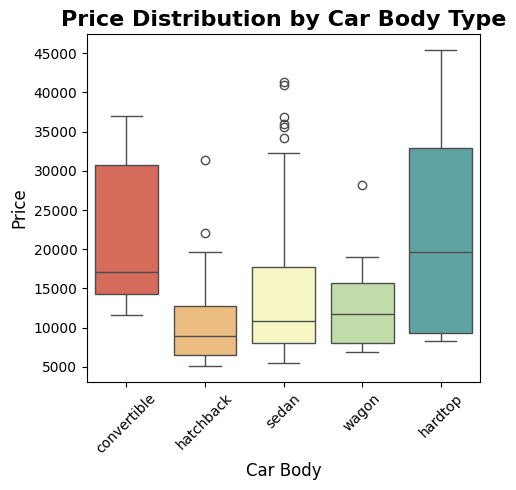

In [37]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='Body_Type', y='Price', data=df, palette='Spectral')
plt.title('Price Distribution by Car Body Type', fontsize=16, fontweight='bold')
plt.xlabel('Car Body', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**<font size="+2">Hypothesis: Rear-wheel and four-wheel drive vehicles generally have higher prices than front-wheel drive cars, possibly due to performance capabilities and specialized design.**

/tmp/ipython-input-2367182723.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Drive_Type', y='Price', data=df, palette='cubehelix')


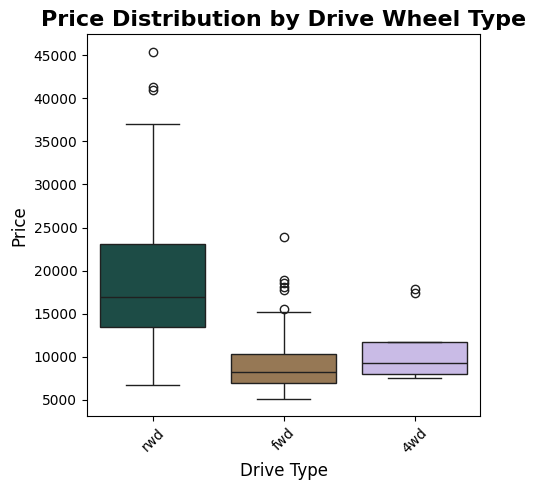

In [38]:
plt.figure(figsize=(5,5))
sns.boxplot(x='Drive_Type', y='Price', data=df, palette='cubehelix')
plt.title('Price Distribution by Drive Wheel Type', fontsize=16, fontweight='bold')
plt.xlabel('Drive Type', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**<font size="+2">Hypothesis: Cars with rear-engine configurations are often positioned in high-performance or luxury segments, leading to significantly higher median prices compared to front-engine vehicles.**

/tmp/ipython-input-2279755205.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Engine_Location', y='Price', data=df, palette='YlGnBu')


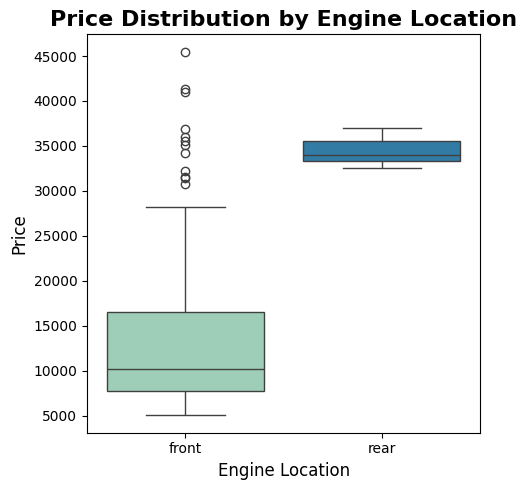

In [39]:
plt.figure(figsize=(5,5))
sns.boxplot(x='Engine_Location', y='Price', data=df, palette='YlGnBu')
plt.title('Price Distribution by Engine Location', fontsize=16, fontweight='bold')
plt.xlabel('Engine Location', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.tight_layout()
plt.show()


**<font size="+2">Hypothesis: Advanced engines like DOHC and OHCV are found in premium vehicles with higher prices, while simpler engines are common in lower-priced models.**

/tmp/ipython-input-2746465627.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Engine_Type', y='Price', data=df, palette='rocket')


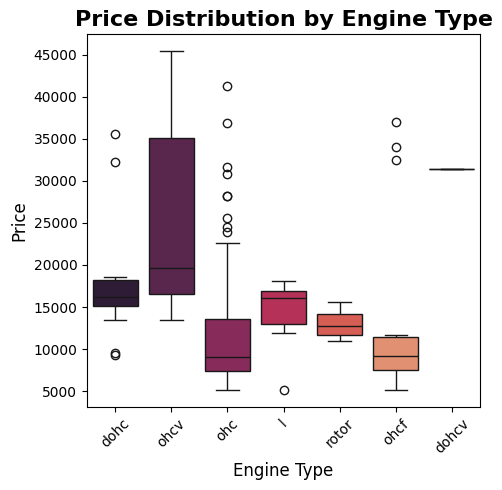

In [40]:
plt.figure(figsize=(5,5))
sns.boxplot(x='Engine_Type', y='Price', data=df, palette='rocket')
plt.title('Price Distribution by Engine Type', fontsize=16, fontweight='bold')
plt.xlabel('Engine Type', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**<font size="+2">Hypothesis: Modern fuel systems such as MPFI and IDI are tied to higher prices, while basic systems like 1bbl and 2bbl appear in more economical cars.**

/tmp/ipython-input-3955544842.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fuel_System', y='Price', data=df, palette='crest')


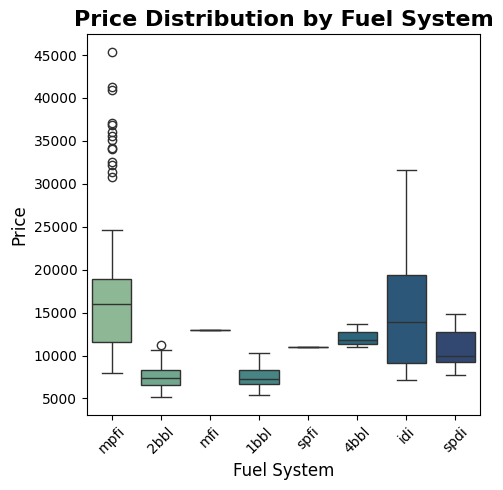

In [41]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='Fuel_System', y='Price', data=df, palette='crest')
plt.title('Price Distribution by Fuel System', fontsize=16, fontweight='bold')
plt.xlabel('Fuel System', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# **Impact of Physical, Performance, and Efficiency Features on Car Prices**

**<font size="+2">Hypothesis:Higher values in wheelbase, length, width, weight, engine size, bore ratio, stroke, compression ratio, horsepower, and peak RPM are expected to correlate with higher prices due to better performance, comfort, and build quality. Conversely, higher city MPG and highway MPG are more common in budget-friendly models, while premium cars balance fuel efficiency with power.**

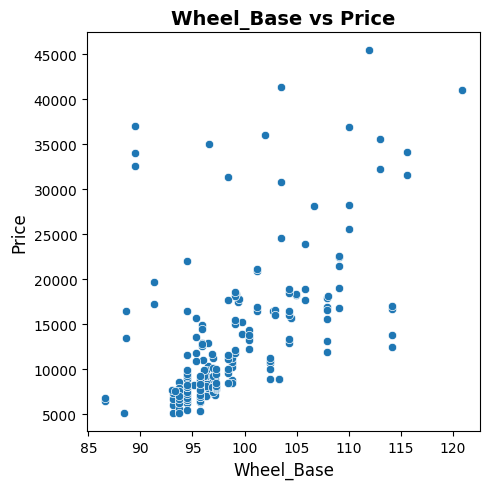

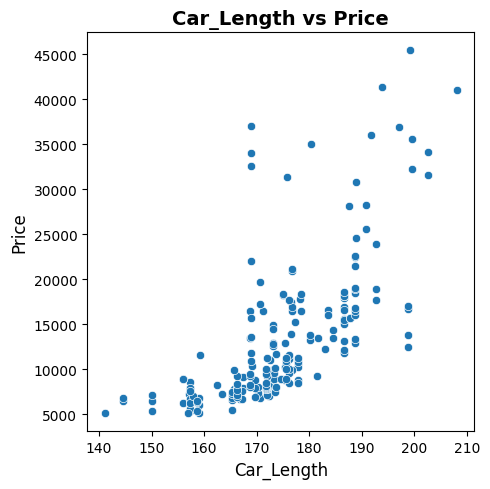

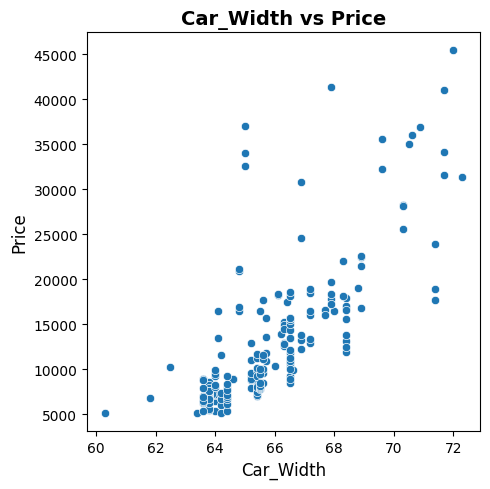

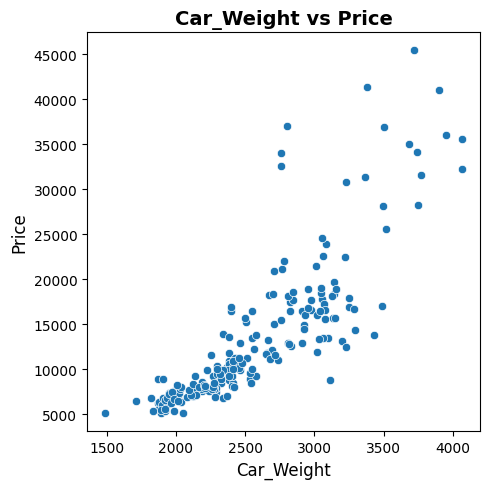

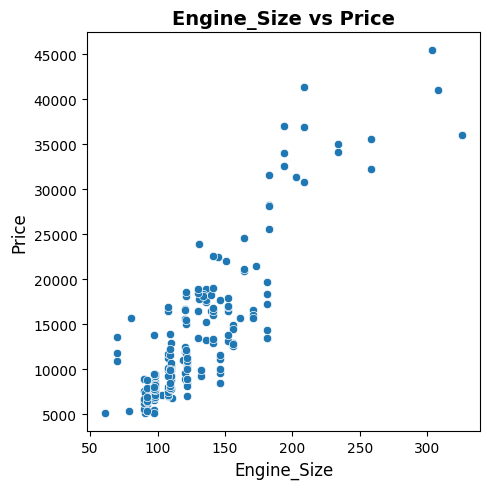

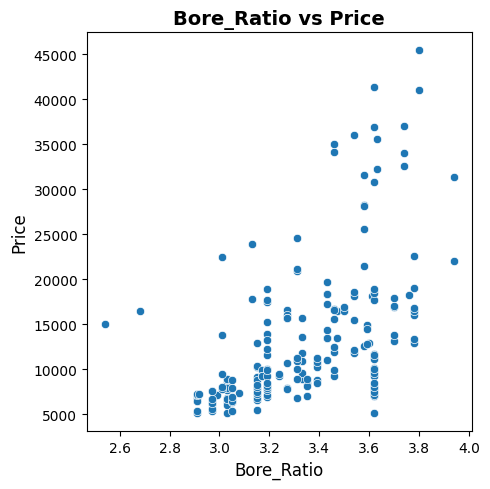

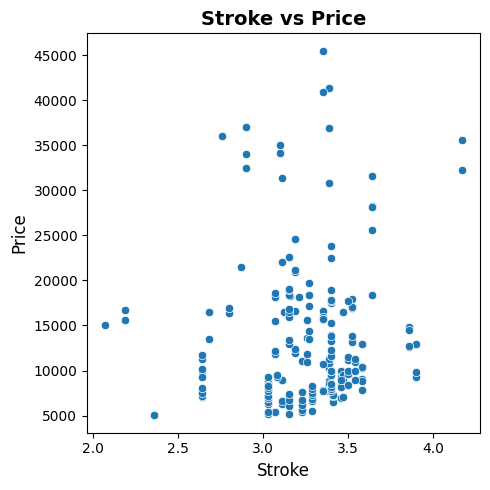

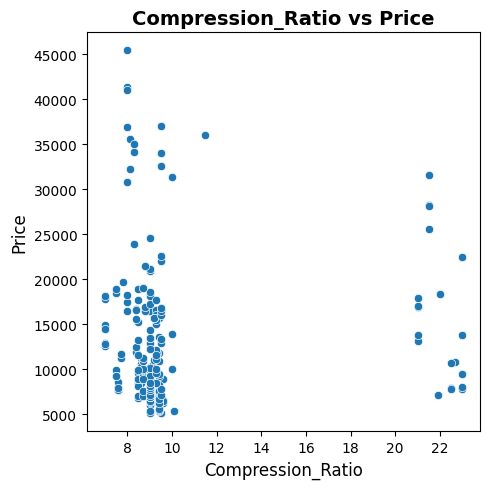

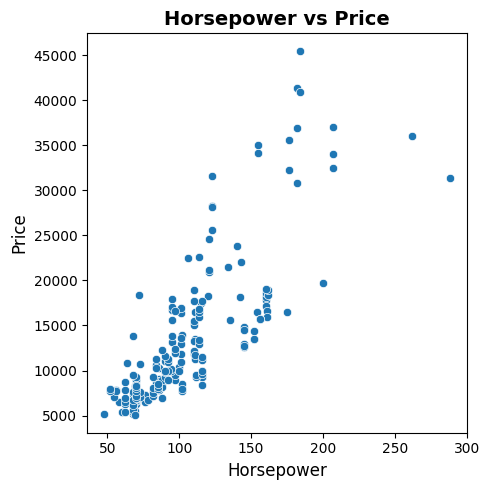

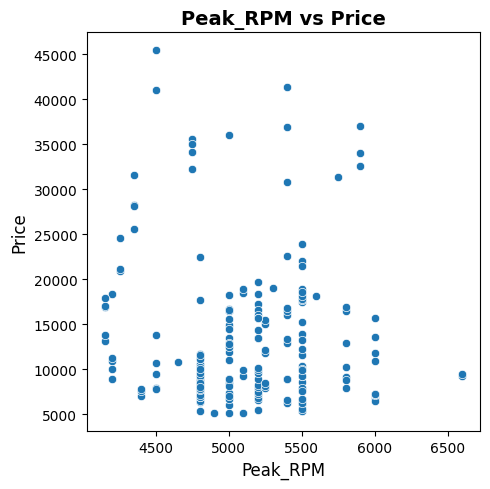

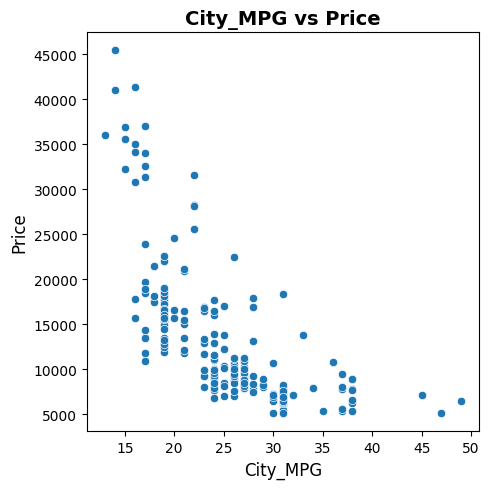

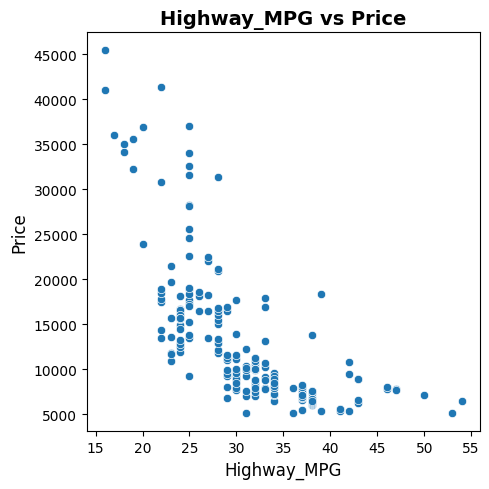

In [42]:
features = ['Wheel_Base', 'Car_Length', 'Car_Width', 'Car_Weight',
            'Engine_Size', 'Bore_Ratio', 'Stroke', 'Compression_Ratio',
            'Horsepower', 'Peak_RPM', 'City_MPG', 'Highway_MPG']

for feature in features:
    plt.figure(figsize=(5, 5))
    sns.scatterplot(data=df, x=feature, y='Price')
    plt.title(f'{feature} vs Price', fontsize=14, fontweight='bold')
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Price', fontsize=12)
    plt.tight_layout()
    plt.show()

# **Impact of Key Vehicle Specifications on Price**

**<font size="+2">Hypothesis: Increases in dimensions (wheelbase, length, width, weight) and performance attributes (engine size, bore ratio, stroke, compression ratio, horsepower, peak RPM) are expected to raise prices due to their link with quality and capability, while higher fuel efficiency (city and highway MPG) is more common in budget models, with premium cars balancing efficiency and performance.**

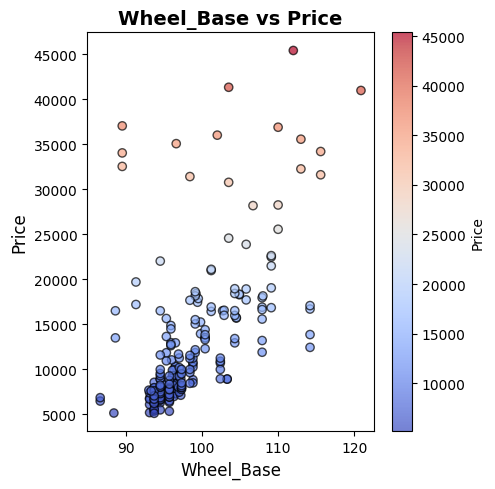

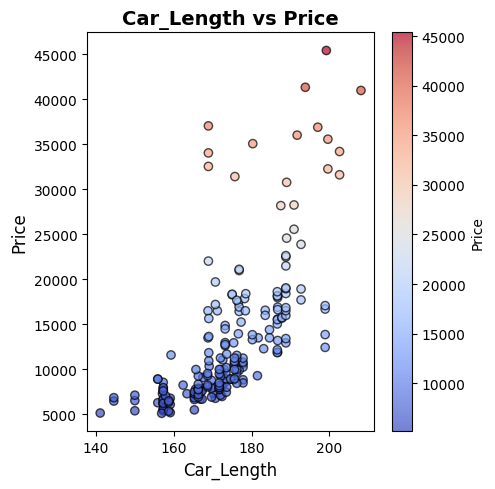

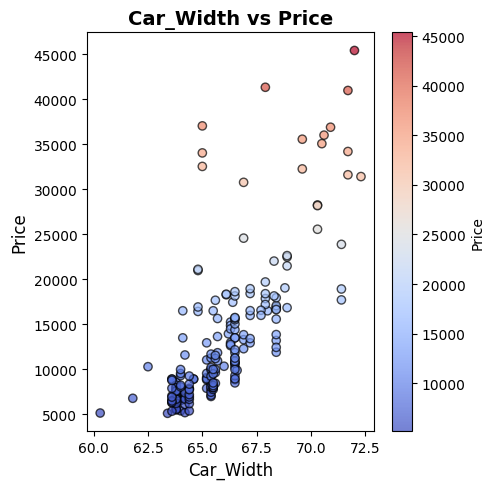

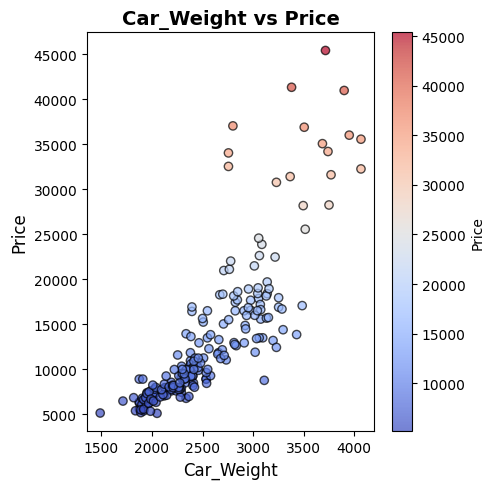

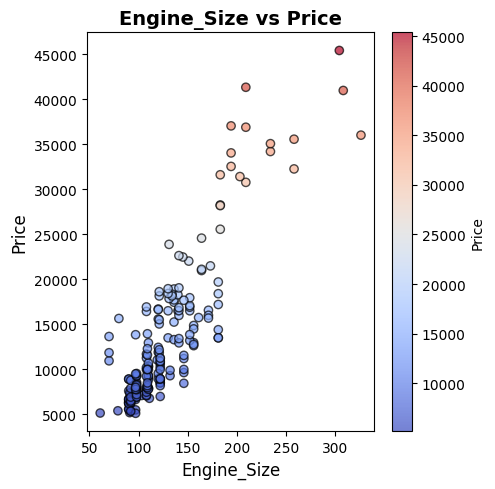

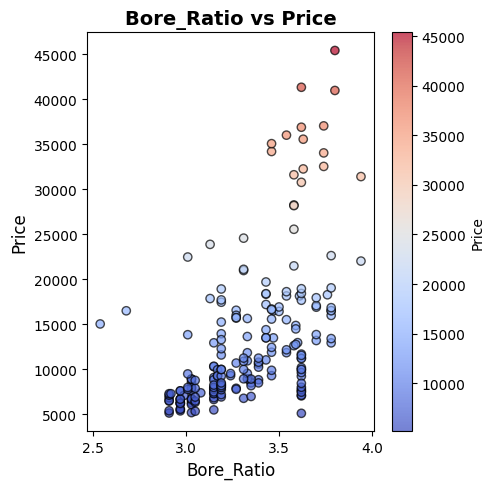

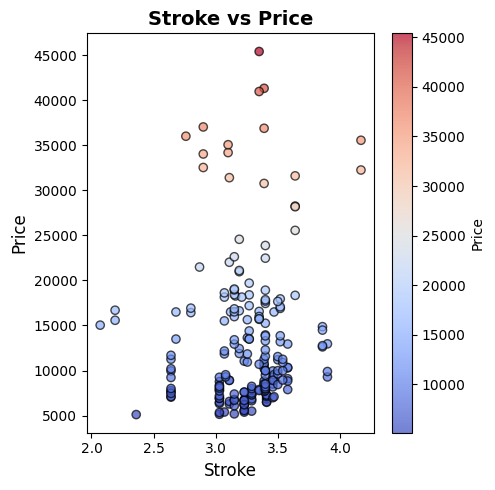

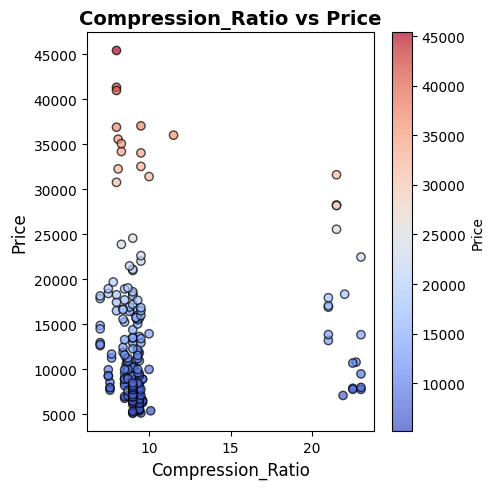

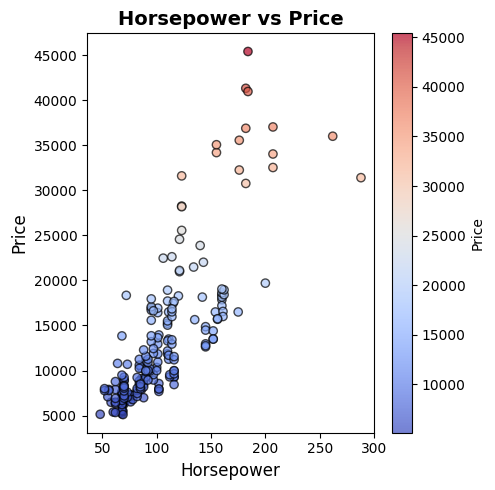

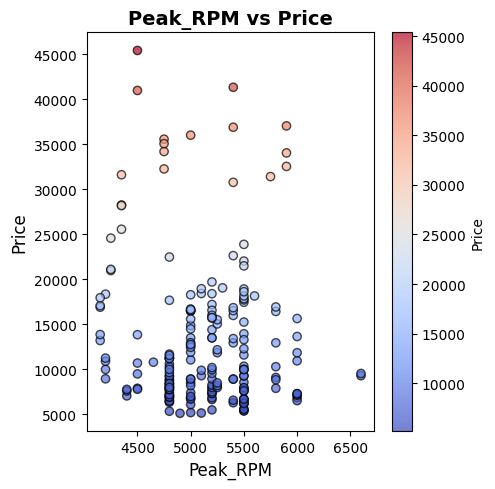

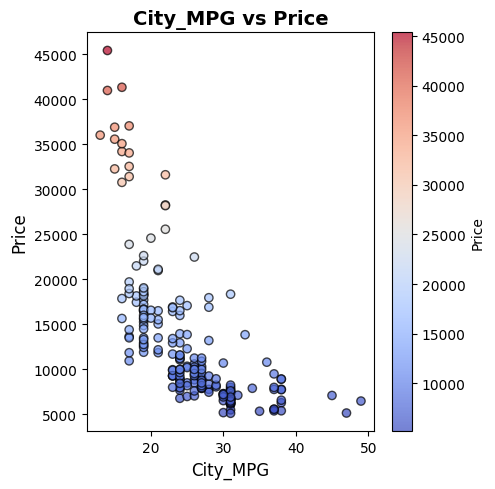

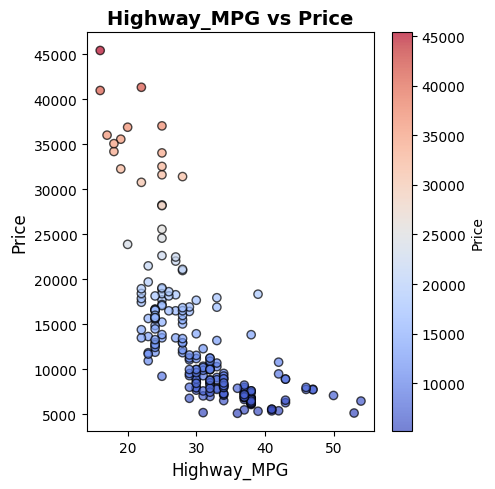

In [43]:
features = ['Wheel_Base', 'Car_Length', 'Car_Width', 'Car_Weight',
            'Engine_Size', 'Bore_Ratio', 'Stroke', 'Compression_Ratio',
            'Horsepower', 'Peak_RPM', 'City_MPG', 'Highway_MPG']

for feature in features:
    plt.figure(figsize=(5, 5))
    scatter = plt.scatter(df[feature], df['Price'],
                          c=df['Price'], cmap='coolwarm',
                          edgecolor='k', alpha=0.7)
    plt.colorbar(scatter, label='Price')
    plt.title(f'{feature} vs Price', fontsize=14, fontweight='bold')
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Price', fontsize=12)
    plt.tight_layout()
    plt.show()


# **Relationship Between Car Dimensions and Price**

**<font size="+2">Hypothesis: Larger cars, indicated by greater length and width, are often positioned in premium segments, which generally leads to higher prices.**

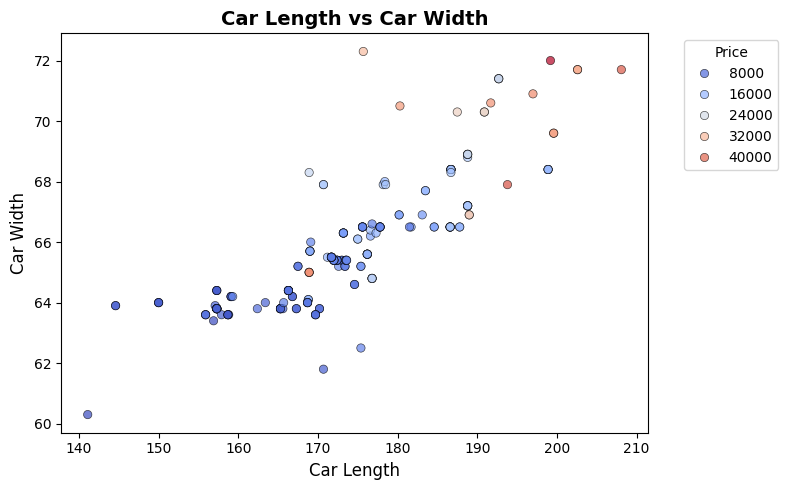

In [44]:

plt.figure(figsize=(8, 5))
sns.scatterplot(x='Car_Length', y='Car_Width', data=df, hue='Price', palette='coolwarm', edgecolor='k', alpha=0.7)

plt.title('Car Length vs Car Width', fontsize=14, fontweight='bold')
plt.xlabel('Car Length', fontsize=12)
plt.ylabel('Car Width', fontsize=12)
plt.legend(title='Price', bbox_to_anchor=(1.05, 1), loc='upper left')  # optional
plt.tight_layout()
plt.show()

# **Correlation Between Numerical Features in the Dataset**

**<font size="+2">Hypothesis: Price shows strong positive correlations with car dimensions, weight, engine size, and horsepower, suggesting larger and more powerful cars command higher prices, while strong negative correlations with city and highway MPG indicate that more fuel-efficient cars are typically less expensive.**

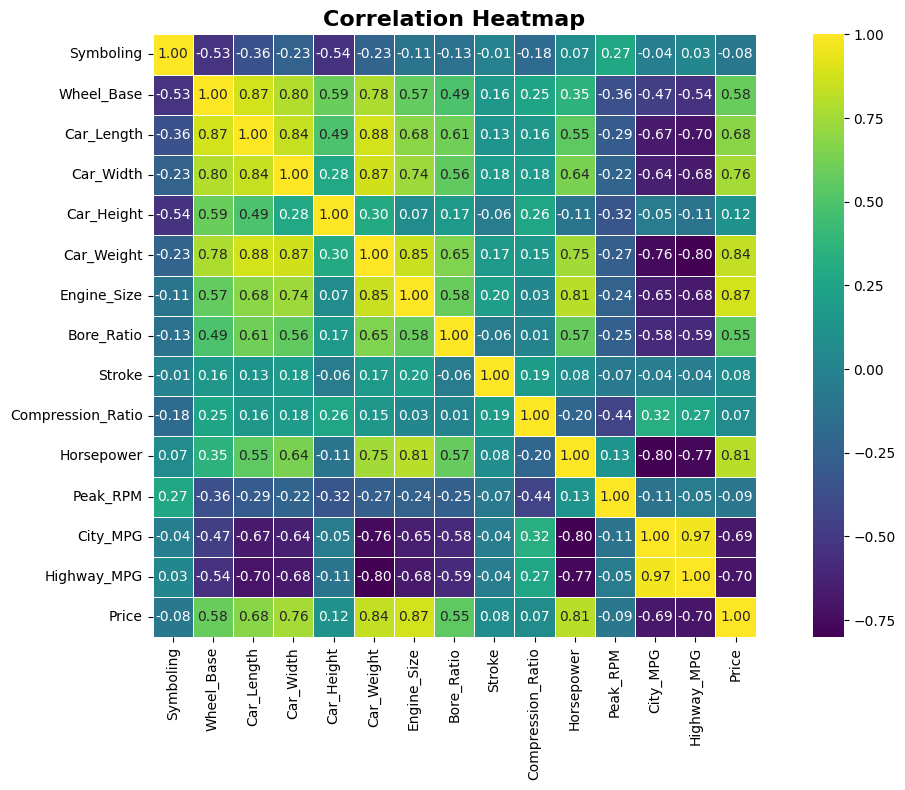

In [45]:
corr = df.select_dtypes(include='number').corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5, square=True)

plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


# **Relationship Between Car Features and Price**

**<font size="+2">Hypothesis: Car dimensions and weight (Wheel Base, Length, Height, and Weight) are positively correlated with car price.**

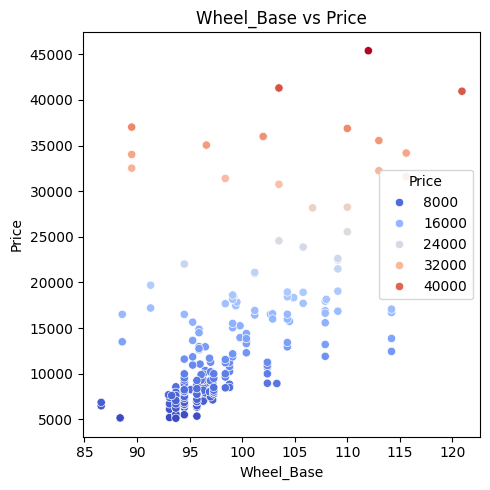

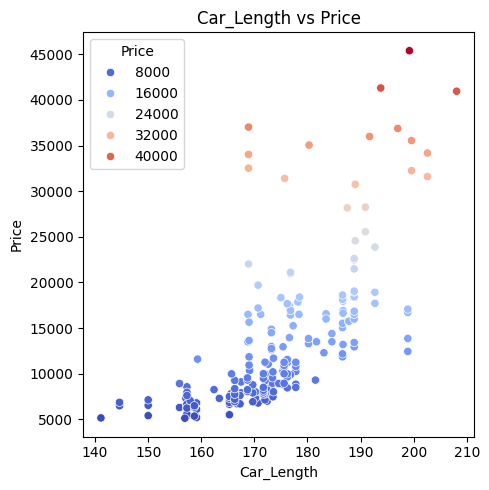

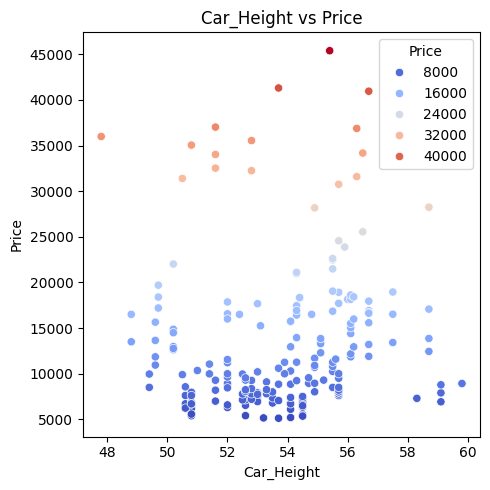

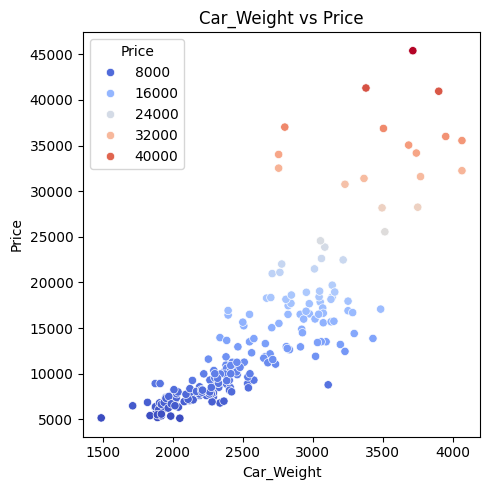

In [46]:
features_q44 = ['Wheel_Base', 'Car_Length', 'Car_Height', 'Car_Weight']
for feature in features_q44:
    plt.figure(figsize=(5, 5))
    sns.scatterplot(data=df, x=feature, y='Price', hue='Price', palette='coolwarm')
    plt.title(f'{feature} vs Price')
    plt.tight_layout()
    plt.show()

# **Pairwise Relationships Between Car Features and Price**

**<font size="+2">Hypothesis: Car features such as Wheel Base, Length, Height, and Weight show positive correlations with Price, indicating that larger and heavier cars tend to be priced higher.**

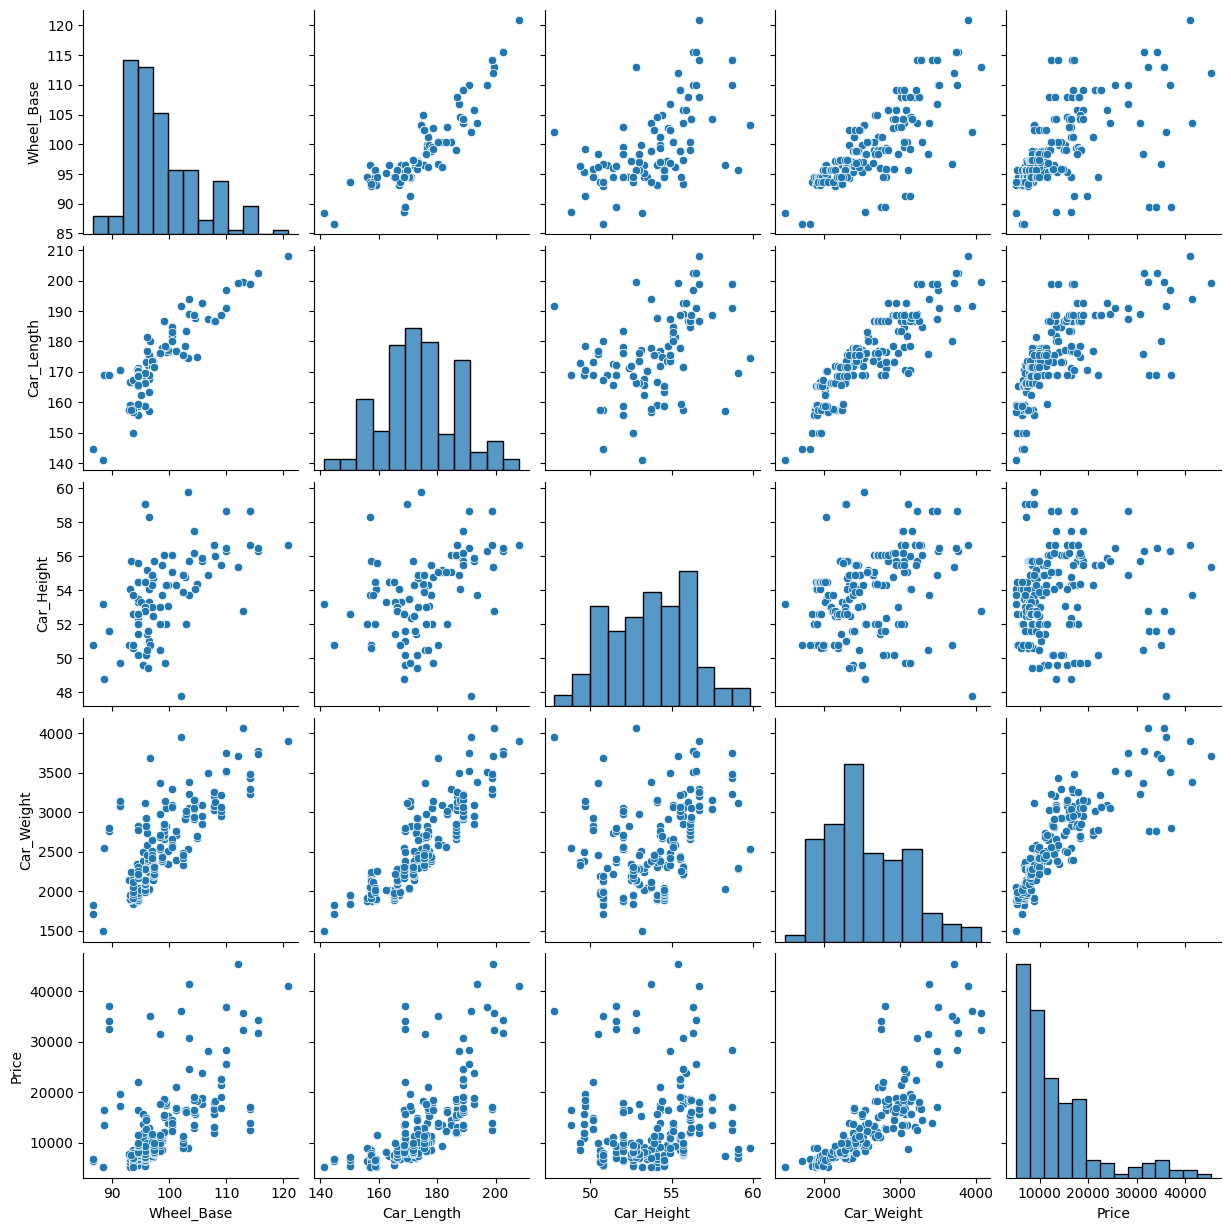

In [47]:
sns.pairplot(df[['Wheel_Base', 'Car_Length', 'Car_Height', 'Car_Weight', 'Price']])


# **Correlation Between Car Features and Price**

**<font size="+2">Hypothesis: Car Length and Car Weight have the strongest positive correlation with Price, while Car Height shows little to no correlation.**

<Axes: >

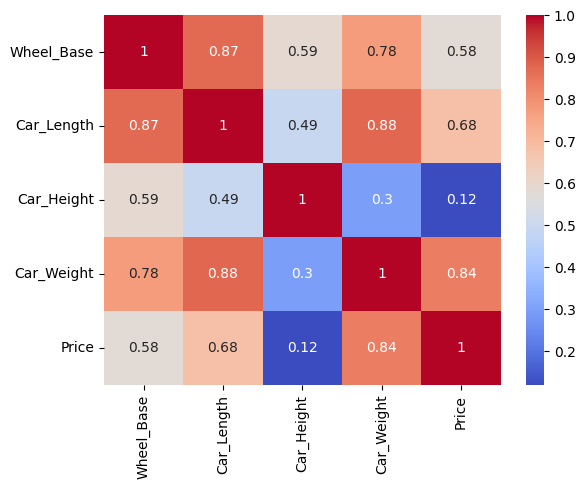

In [48]:
corr_q44 = df[['Wheel_Base', 'Car_Length', 'Car_Height', 'Car_Weight', 'Price']].corr()
sns.heatmap(corr_q44, annot=True, cmap='coolwarm')


# **Impact of Car Dimensions and Fuel Efficiency on Pricee**

**<font size="+2">Hypothesis: Price increases with Car Length and Weight, but decreases with Highway_MPG.**

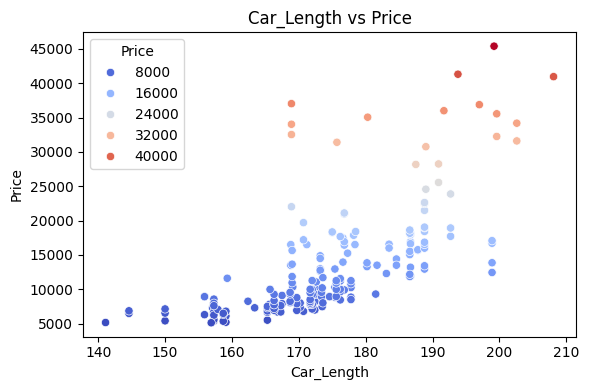

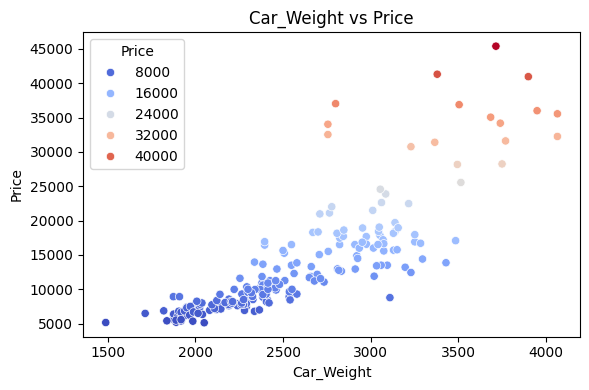

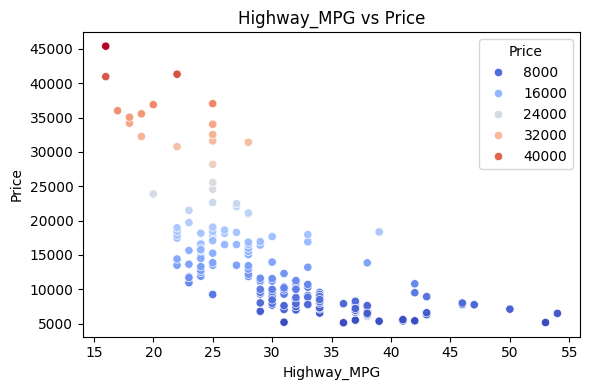

In [49]:
features_q45 = ['Car_Length', 'Car_Weight', 'Highway_MPG']
for feature in features_q45:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=feature, y='Price', hue='Price', palette='coolwarm')
    plt.title(f'{feature} vs Price')
    plt.tight_layout()
    plt.show()


# **Pairwise Relationships of Car Dimensions, Efficiency, and Price**

**<font size="+2">Hypothesis: Car Length and Weight are positively related to Price, while Highway_MPG is negatively related.**

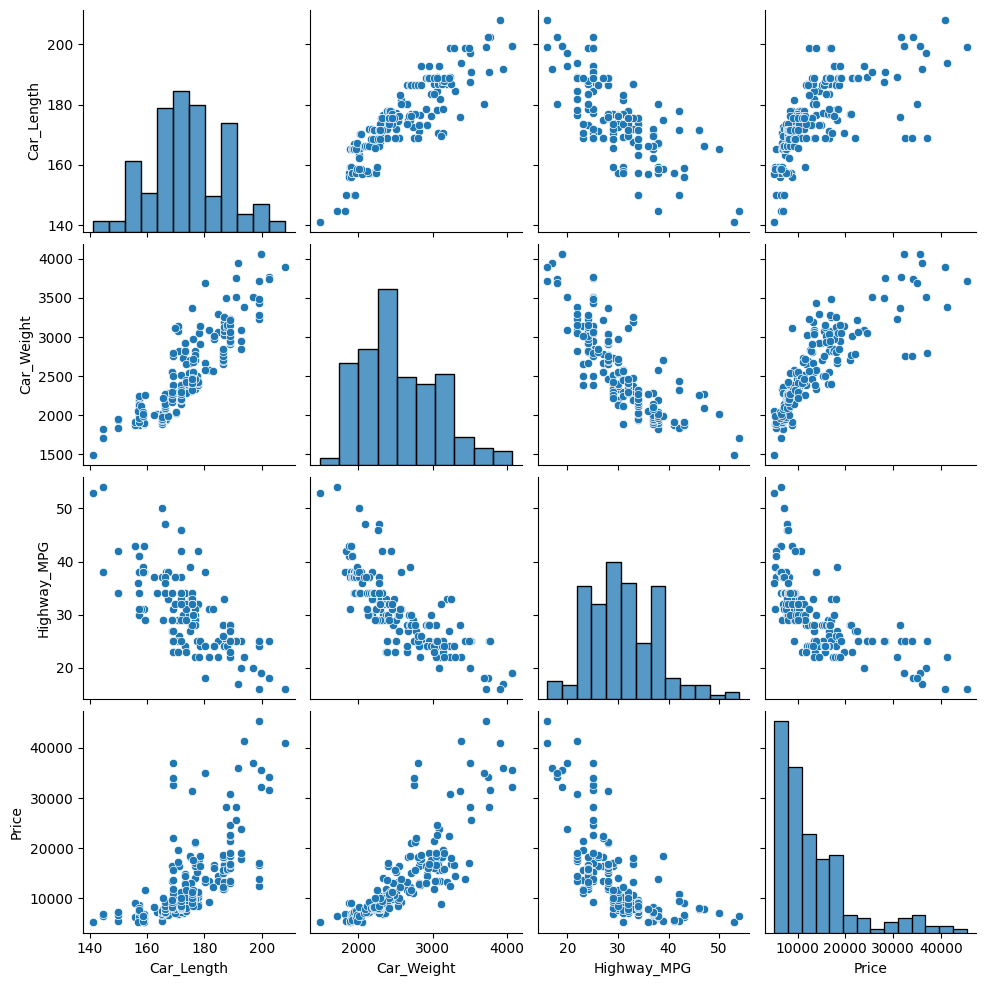

In [50]:
sns.pairplot(df[['Car_Length', 'Car_Weight', 'Highway_MPG', 'Price']])


# **Correlation of Car Dimensions, Efficiency, and Pricen**

**<font size="+2">Hypothesis: Car Length and Weight are strongly positively correlated with Price, while Highway_MPG shows a strong negative correlation.**

<Axes: >

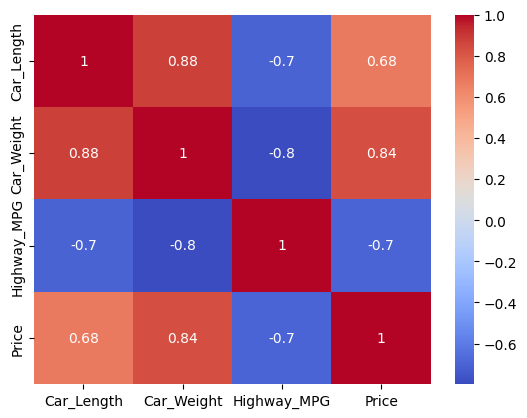

In [51]:
corr_q45 = df[['Car_Length', 'Car_Weight', 'Highway_MPG', 'Price']].corr()
sns.heatmap(corr_q45, annot=True, cmap='coolwarm')


# **Relationship of Car Dimensions and Engine Size with Pricee**

**<font size="+2">Hypothesis: Car Width, Car Weight, and Engine Size are all positively correlated with Price, suggesting that larger and heavier cars with bigger engines tend to be more expensive.**

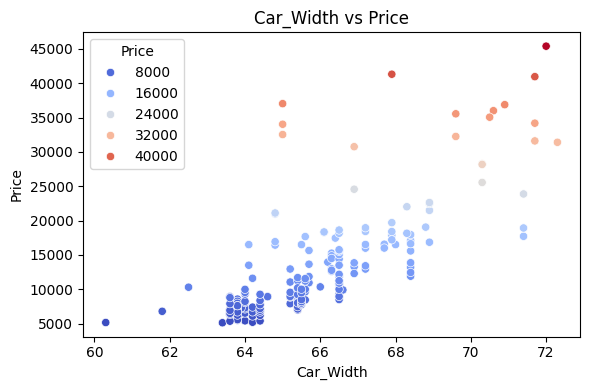

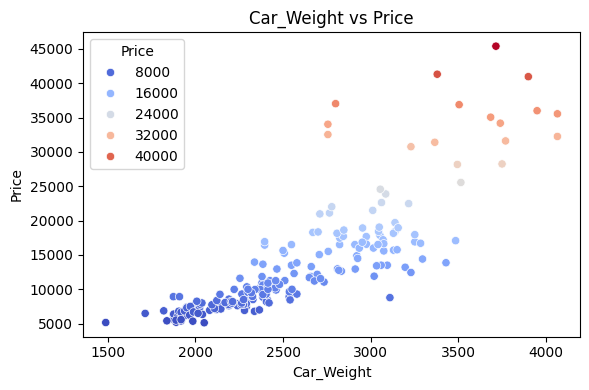

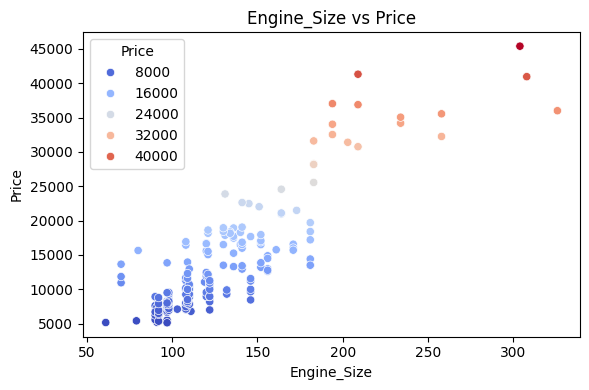

In [52]:
features_q46 = ['Car_Width', 'Car_Weight', 'Engine_Size']
for feature in features_q46:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=feature, y='Price', hue='Price', palette='coolwarm')
    plt.title(f'{feature} vs Price')
    plt.tight_layout()
    plt.show()


# **Pairwise Relationships of Car Dimensions, Engine Size, and Price**

**<font size="+2">Hypothesis: Car Width, Car Weight, and Engine Size all show positive correlations with Price, confirming that larger and more powerful cars tend to be priced higher.**

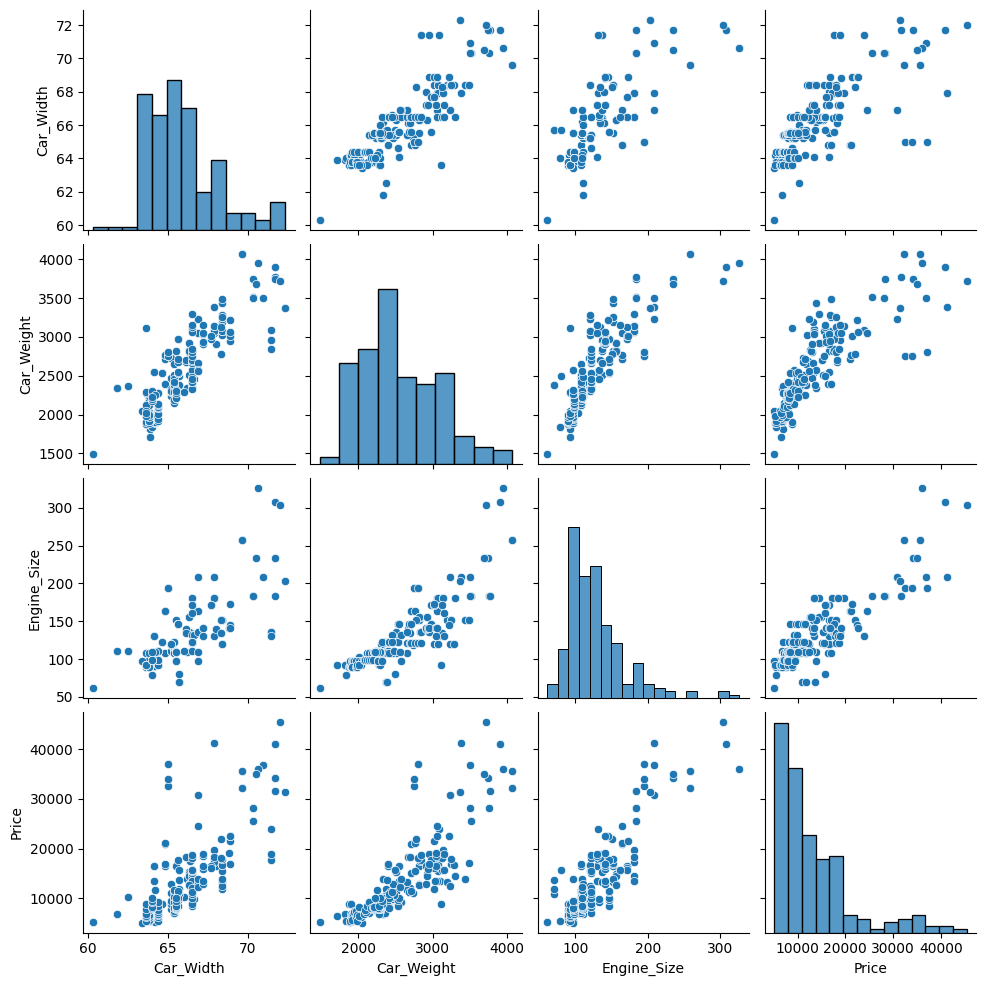

In [53]:
sns.pairplot(df[['Car_Width', 'Car_Weight', 'Engine_Size', 'Price']])


# **Correlation Analysis of Car Dimensions, Engine Size, and Pricee**

**<font size="+2">Hypothesis: Car Width, Car Weight, and Engine Size are all strongly positively correlated with Price, indicating that larger and more powerful cars consistently cost more**

<Axes: >

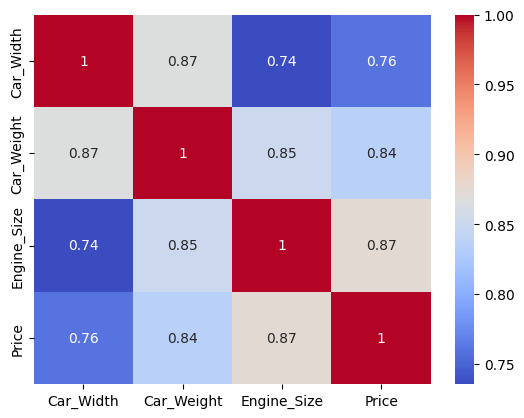

In [54]:
corr_q46 = df[['Car_Width', 'Car_Weight', 'Engine_Size', 'Price']].corr()
sns.heatmap(corr_q46, annot=True, cmap='coolwarm')


# **Comprehensive Analysis of Car Dimensions, Performance, and Price Relationships**

**<font size="+2">Hypothesis: Car dimensions (width, weight), engine size, and horsepower show strong positive correlations with price, while fuel efficiency (Highway_MPG) exhibits a negative correlation. Larger, heavier, and more powerful cars are generally more expensive but less fuel-efficient.**

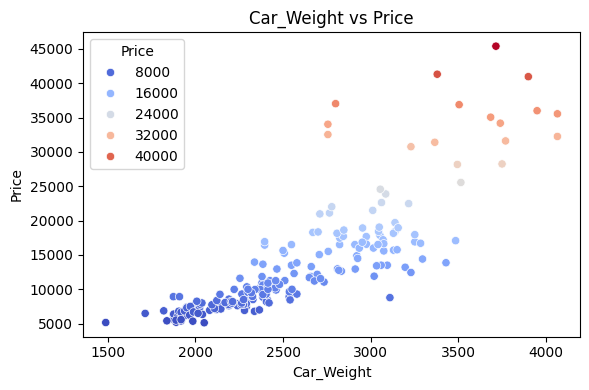

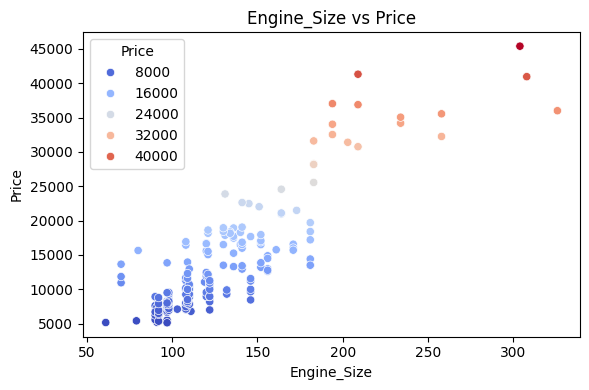

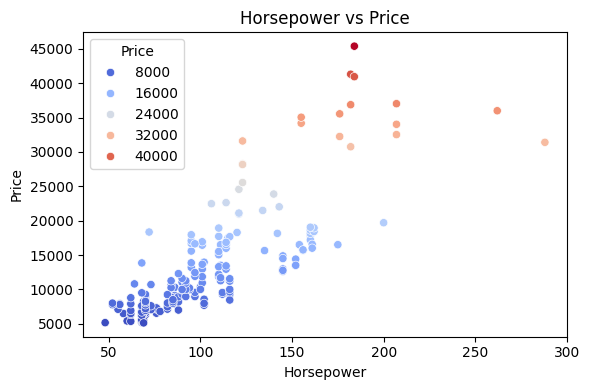

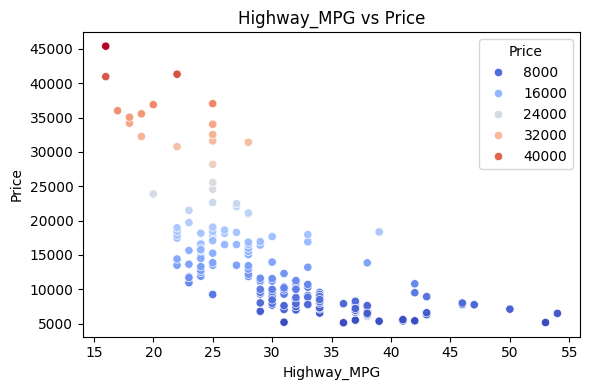

In [55]:
features_q47 = ['Car_Weight', 'Engine_Size', 'Horsepower', 'Highway_MPG']
for feature in features_q47:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=feature, y='Price', hue='Price', palette='coolwarm')
    plt.title(f'{feature} vs Price')
    plt.tight_layout()
    plt.show()


# **Integrated Analysis of Car Attributes, Efficiency, and Pricing Patterns**

**<font size="+2">Hypothesis: Car Weight, Engine Size, and Horsepower exhibit strong positive correlations with Price, whereas Highway_MPG shows a strong negative correlation. This indicates that larger, heavier, and more powerful cars are generally more expensive but come with reduced fuel efficiency.**

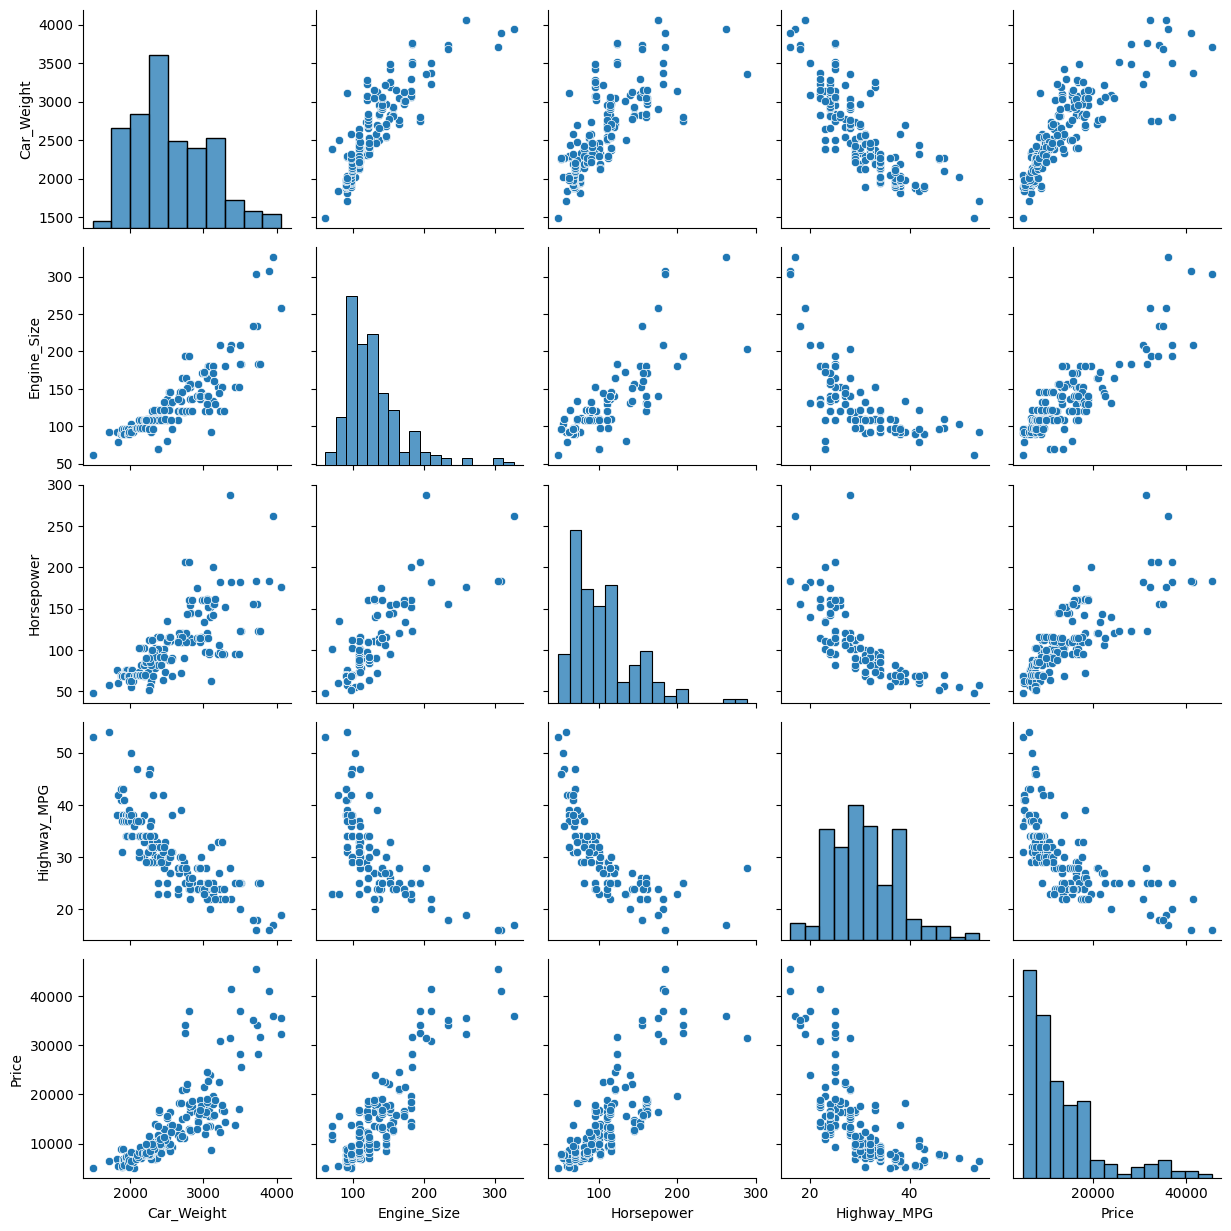

In [56]:
sns.pairplot(df[['Car_Weight', 'Engine_Size', 'Horsepower', 'Highway_MPG', 'Price']])


# **Comprehensive Correlation Analysis of Car Specifications and Price**

**<font size="+2">Hypothesis:  Car Weight, Engine Size, and Horsepower are expected to show strong positive correlations with Price, while Highway_MPG is expected to be negatively correlated, reflecting the trade-off between performance and fuel efficiency.**

<Axes: >

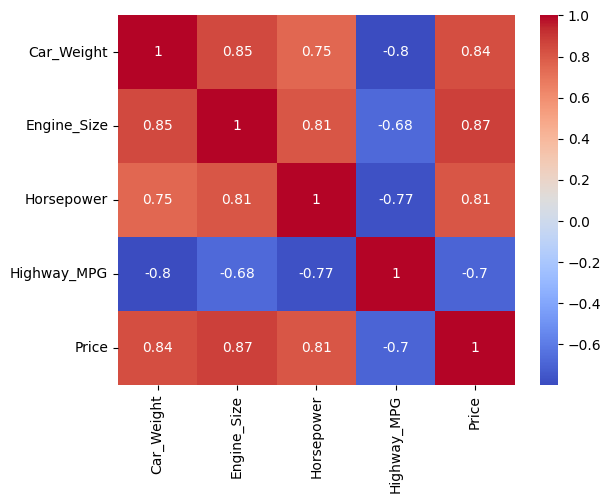

In [57]:
corr_q47 = df[['Car_Weight', 'Engine_Size', 'Horsepower', 'Highway_MPG', 'Price']].corr()
sns.heatmap(corr_q47, annot=True, cmap='coolwarm')


# **Relationship Between Engine Power, Fuel Efficiency, and Car Price**

**<font size="+2">Hypothesis: Higher horsepower increases car price, while greater fuel efficiency (City_MPG and Highway_MPG) is generally associated with lower prices.**

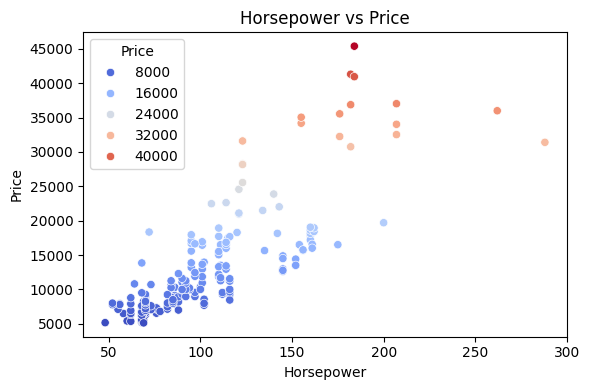

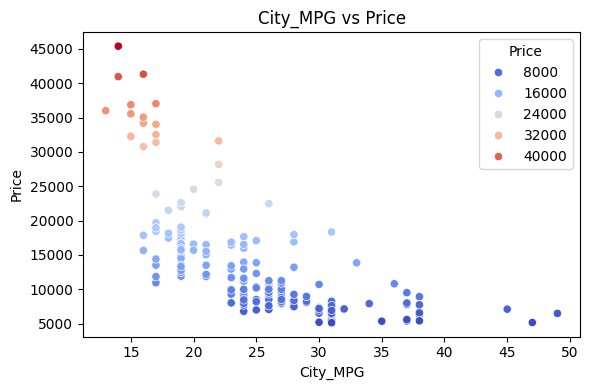

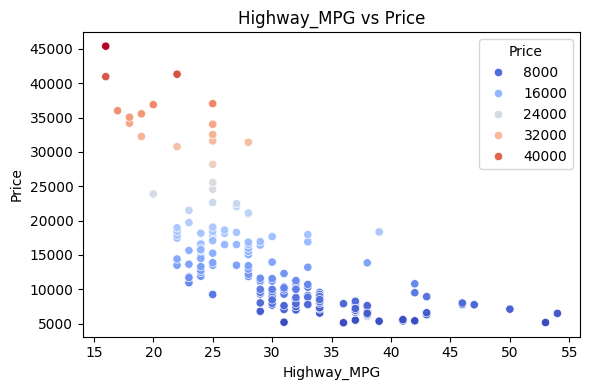

In [58]:
features_q48 = ['Horsepower', 'City_MPG', 'Highway_MPG']
for feature in features_q48:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=feature, y='Price', hue='Price', palette='coolwarm')
    plt.title(f'{feature} vs Price')
    plt.tight_layout()
    plt.show()


# **Pairwise Relationships of Horsepower, Fuel Efficiency, and Car Price**

**<font size="+2">Hypothesis: Strong negative correlations exist between fuel efficiency (City_MPG, Highway_MPG) and both horsepower and price, while horsepower is positively correlated with car price.**

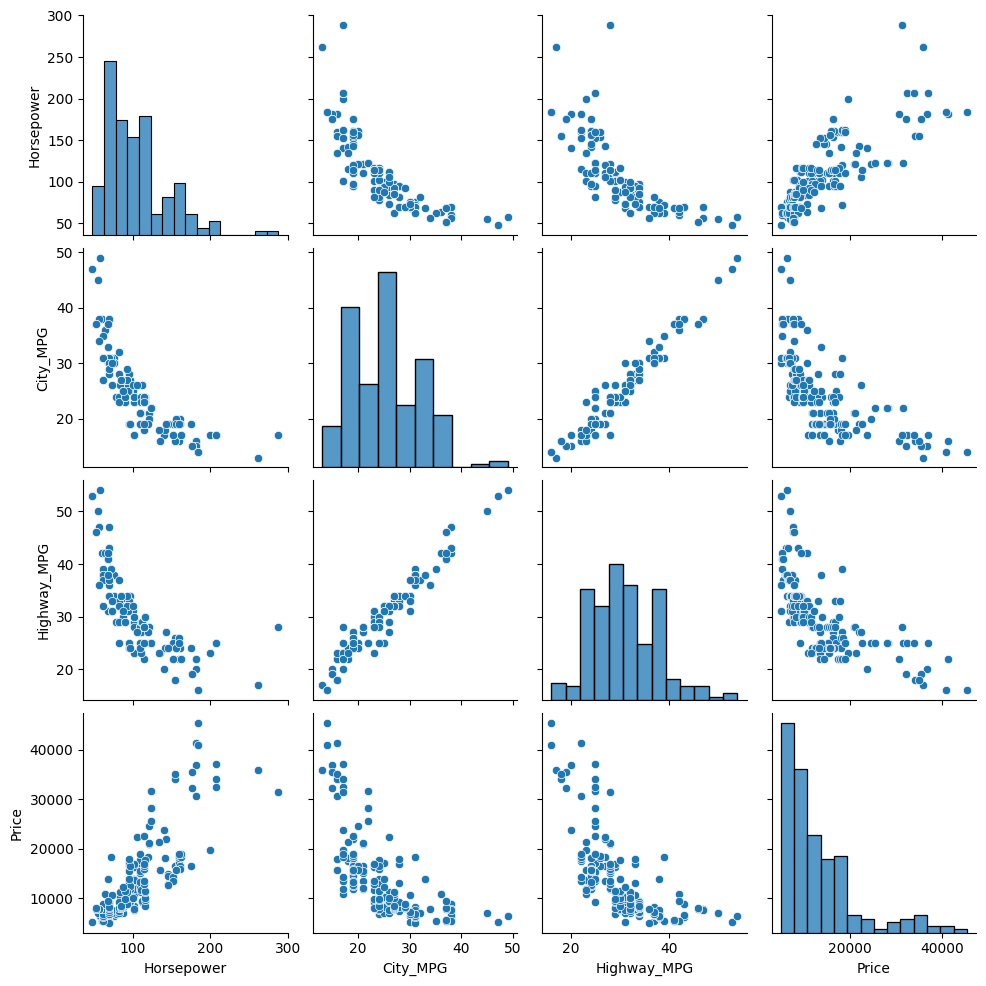

In [59]:
sns.pairplot(df[['Horsepower', 'City_MPG', 'Highway_MPG', 'Price']])


# **Correlation Analysis of Horsepower, Fuel Efficiency, and Price**

**<font size="+2">Hypothesis: Horsepower is strongly positively correlated with price, while City_MPG and Highway_MPG show strong negative correlations with both horsepower and price.**

<Axes: >

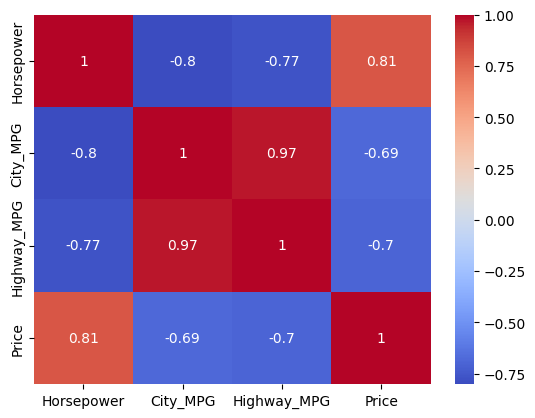

In [60]:
corr_q48 = df[['Horsepower', 'City_MPG', 'Highway_MPG', 'Price']].corr()
sns.heatmap(corr_q48, annot=True, cmap='coolwarm')


# **Pairwise Relationship of Horsepower and Price Across Body Types**

**<font size="+2">Hypothesis: Different body types exhibit distinct distributions of horsepower and price, with higher-end body types (e.g., convertibles, sedans) tending toward higher horsepower and price compared to hatchbacks and wagons.**

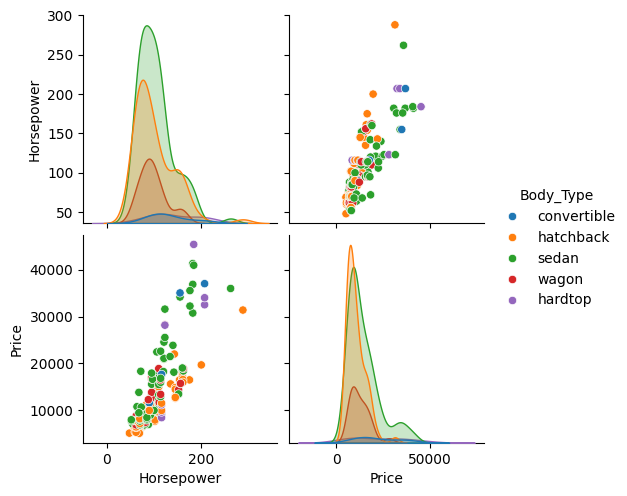

In [61]:
sns.pairplot(df[['Horsepower', 'Price', 'Body_Type']], hue='Body_Type')


# **Regression Analysis of Car Dimensions, Engine Features, and Price**

**<font size="+2">Hypothesis: Car dimensions (length, width, weight) and engine-related features (engine size, horsepower) show strong positive linear relationships with price, while variables like stroke, compression ratio, and peak RPM have weaker or negligible effects.**

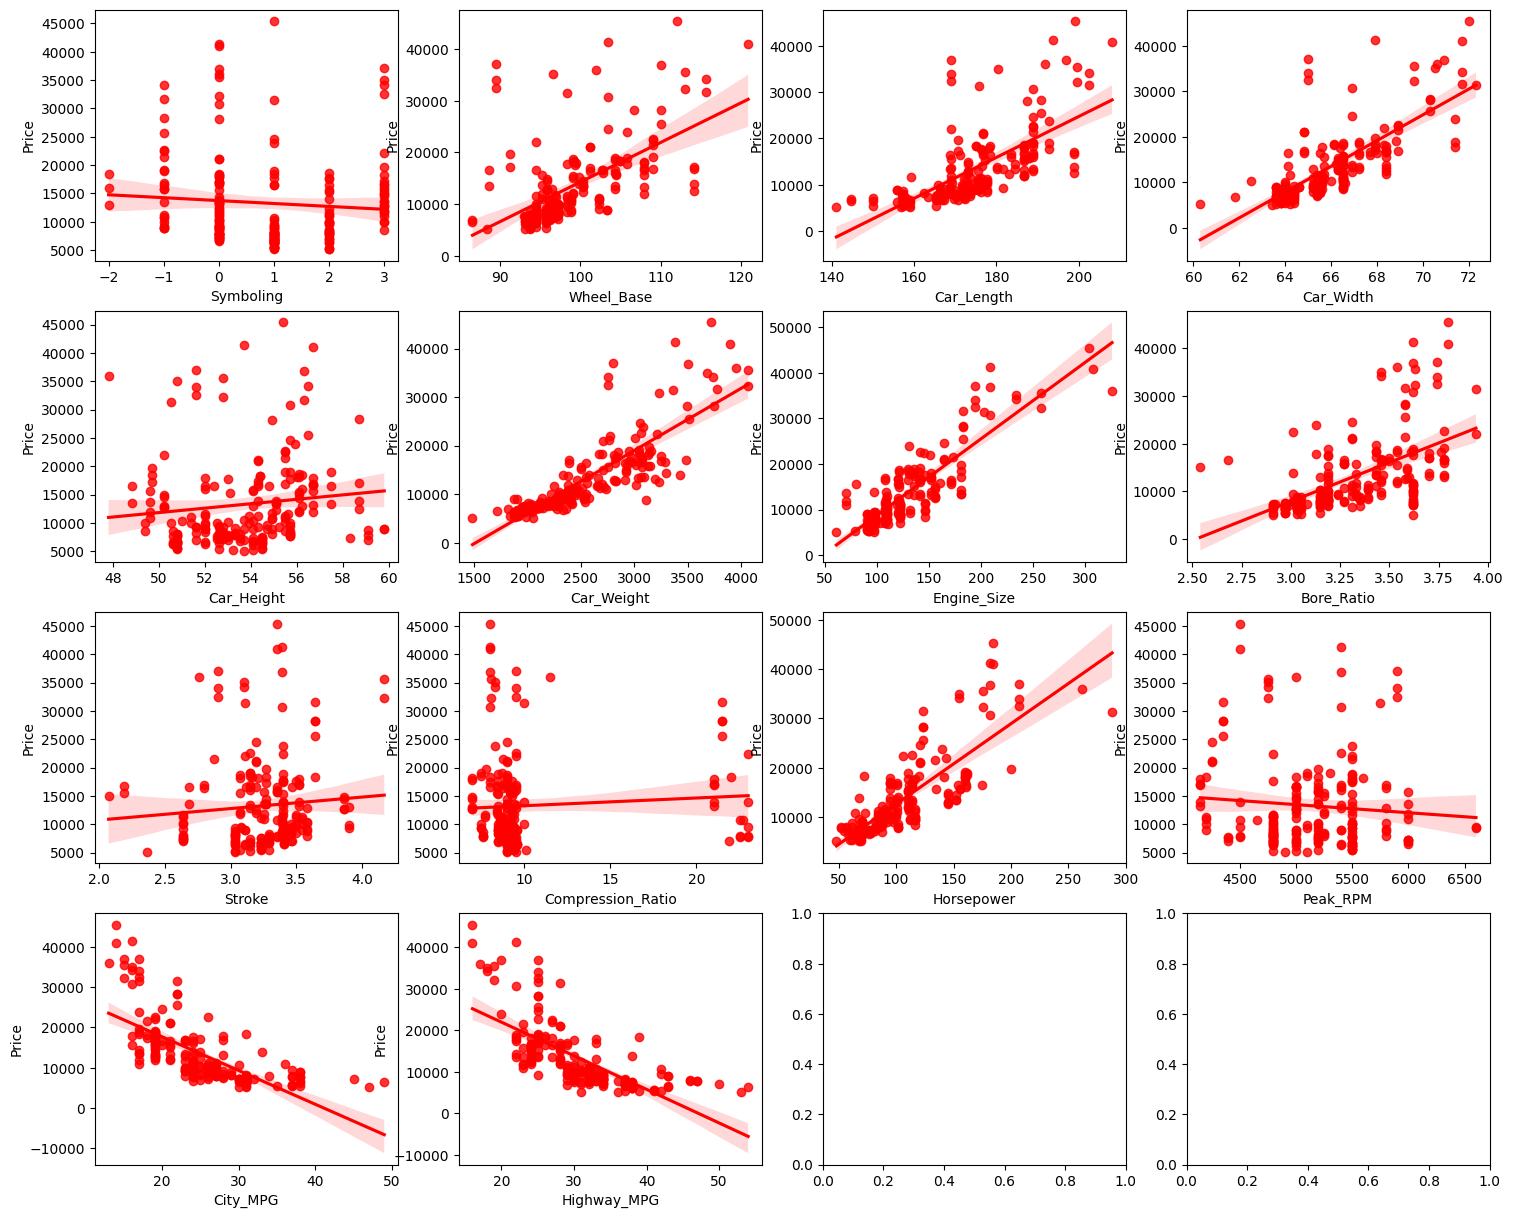

In [62]:
fig, axes = plt.subplots(4, 4, figsize=(18, 15))
numerical_cols = df.select_dtypes(include='number').columns.tolist()

for seg, col in enumerate(numerical_cols):
    if col != 'Price':
        x, y = seg // 4, seg % 4
        sns.regplot(x=col, y='Price', data=df, ax=axes[x][y], color='r')

# **Feature Selection and Model Evaluation for Car Price Prediction**

**<font size="+2">Explanation: We prepared the dataset by dropping irrelevant identifiers and encoding categorical variables, taking all independent variables (car specifications and attributes) as X and the target variable Price as y. Using Recursive Feature Elimination (RFE) with a Random Forest Regressor, we selected the top 15 most important predictors of car price. The refined dataset was then split into training and testing sets for model development.**

In [63]:
if 'CarName' in df.columns:
    df = df.drop(['CarName'], axis=1)


label_enc = preprocessing.LabelEncoder()
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    df[col] = label_enc.fit_transform(df[col])


X = df.drop('Price', axis=1)
y = df['Price']


clf_rf = RandomForestRegressor(random_state=0)
rfe = RFE(estimator=clf_rf, n_features_to_select=15, step=1)
rfe.fit(X, y)


selected_features = list(X.columns[rfe.support_])
print("Chosen best 15 features by RFE:", selected_features)


X_selected = X[selected_features]


x_train, x_test, y_train, y_test = train_test_split(X_selected, y, random_state=42)

Chosen best 15 features by RFE: ['Body_Type', 'Wheel_Base', 'Car_Length', 'Car_Width', 'Car_Height', 'Car_Weight', 'Engine_Size', 'Bore_Ratio', 'Stroke', 'Compression_Ratio', 'Horsepower', 'Peak_RPM', 'City_MPG', 'Highway_MPG', 'Brand']


# **Linear Regression**

In [64]:
lreg = linear_model.LinearRegression()
lreg.fit(x_train, y_train)
y_pred_lr = lreg.predict(x_test)
print("Linear Regression R2 Score:", r2_score(y_test, y_pred_lr))
print("Linear Regression MSE Score:", mean_squared_error(y_test, y_pred_lr))

Linear Regression R2 Score: 0.8479524412101045
Linear Regression MSE Score: 10287467.41167918


# **Decision Tree**

In [65]:
dt_reg = DecisionTreeRegressor(random_state=0)
dt_reg.fit(x_train, y_train)
y_pred_dt = dt_reg.predict(x_test)
print("Decision Tree R2 Score:", r2_score(y_test, y_pred_dt))
print("Decision Tree MSE Score:", mean_squared_error(y_test, y_pred_dt))

Decision Tree R2 Score: 0.8621925898199615
Decision Tree MSE Score: 9323985.551613249


# **Random Forest**

In [66]:
rf = RandomForestRegressor(
    n_estimators=15,
    criterion='squared_error',
    random_state=42,
    n_jobs=-1
)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
print("Random Forest R2 Score:", r2_score(y_test, y_pred_rf))
print("Random Forest MSE Score:", mean_squared_error(y_test, y_pred_rf))


Random Forest R2 Score: 0.9313447090756225
Random Forest MSE Score: 4645185.188404514


# **Model Performance Comparison for Car Price Prediction**

**<font size="+2">Hypothesis: Random Forest achieves the best predictive performance with the highest R² score and lowest MSE, outperforming both Linear Regression and Decision Tree models in car price prediction.**

In [67]:

linear_r2 = r2_score(y_test, y_pred_lr)
tree_r2 = r2_score(y_test, y_pred_dt)
forest_r2 = r2_score(y_test, y_pred_rf)

linear_mse = mean_squared_error(y_test, y_pred_lr)
tree_mse = mean_squared_error(y_test, y_pred_dt)
forest_mse = mean_squared_error(y_test, y_pred_rf)

models = ['Linear Regression', 'Decision Tree', 'Random Forest']
r2_scores = [linear_r2, tree_r2, forest_r2]
mse_scores = [linear_mse, tree_mse, forest_mse]



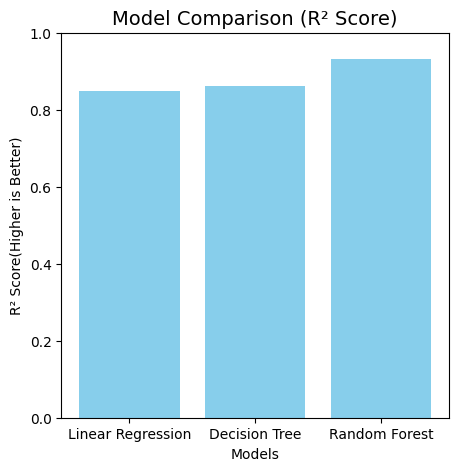

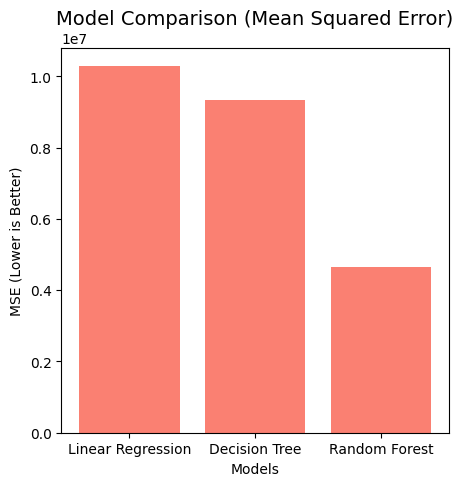

In [68]:
plt.figure(figsize=(5, 5))
plt.bar(models, r2_scores, color='skyblue')
plt.ylim(0, 1)
plt.title('Model Comparison (R² Score)', fontsize=14)
plt.ylabel('R² Score(Higher is Better)')
plt.xlabel('Models')
plt.show()

plt.figure(figsize=(5, 5))
plt.bar(models, mse_scores, color='salmon')
plt.title('Model Comparison (Mean Squared Error)', fontsize=14)
plt.ylabel('MSE (Lower is Better)')
plt.xlabel('Models')
plt.show()

<font size="+3" color="seagreen"><b>**📊 Predictions:**</b></font><br>
<font size="+3" color='orangered'><b> **Across the five test samples, Random Forest consistently provided predictions closest to the actual prices, showing lower error compared to Linear Regression and Decision Tree models. This confirms that Random Forest is the most reliable model for accurate car price prediction in this analysis.**

# **Automated CSV Export to Google Drive**

In [69]:
from google.colab import drive
drive.mount('/content/drive')

def auto_save(df, filename="Final_Car_Price_Data.csv",
              path="/content/drive/MyDrive/DA_docs/DA_Project_Docs/Car_Price_Prediction_Doc/"):
    save_path = f"{path}{filename}"
    df.to_csv(save_path, index=False)
    print(f"✅ Data saved to: {save_path}")

auto_save(df)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Data saved to: /content/drive/MyDrive/DA_docs/DA_Project_Docs/Car_Price_Prediction_Doc/Final_Car_Price_Data.csv
